CAPSTONE PROJECT_RFM ANALYSIS

In [1]:
!pip install missingno
!pip install skimpy


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import missingno as msno
from scipy import stats
import seaborn as sns
from textwrap import wrap
from skimpy import clean_columns

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10, 6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.options.display.max_rows = 300
pd.options.display.max_columns = 100

In [3]:
# # Reading and assigning the data to an object named "kill"

# !pip install rarfile

# import rarfile

# with rarfile.RarFile("/content/customer.rar", "r") as data: #, encoding='unicode_escape'
#     data.extractall()

In [4]:
df0 = pd.read_csv("C:\\Users\\ggork\\Downloads\\customer.csv")
df=df0.copy()

In [5]:
df.info() #object datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceDate  541909 non-null  object 
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Age          541909 non-null  int64  
 8   Gender       541909 non-null  object 
 9   Income       541909 non-null  float64
 10  Country      541909 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 45.5+ MB


In [6]:
df.describe().transpose() #negative values!

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.00,9.55,218.08,-80995.00,1.00,3.00,10.00,80995.00
UnitPrice,541909.00,4.61,96.76,-11062.06,1.25,2.08,4.13,38970.00
CustomerID,406829.00,15287.69,1713.60,12346.00,13953.00,15152.00,16791.00,18287.00
Age,541909.00,34.89,13.00,15.00,25.00,31.00,43.00,100.00
Income,541909.00,33127.13,5619.98,18662.73,32130.48,32443.37,33795.30,45925.21



>> Quantity_Min is negative  value and the same number is positive in the max;
80,995 products as been bought and returned.

>> Unit price_Max seems weird as well.

In [7]:
df.head()

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Age,Gender,Income,Country
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.00,77,female,26300.79,United Kingdom
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.00,77,female,26300.79,United Kingdom
2,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.00,77,female,26300.79,United Kingdom
3,2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.00,77,female,26300.79,United Kingdom
4,2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.00,77,female,26300.79,United Kingdom


In [8]:
# Checking all the records which were returned
df[df["InvoiceNo"].str.startswith('C',na=False)]

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Age,Gender,Income,Country
141,2010-12-01 09:41:00,C536379,D,Discount,-1,27.50,14527.00,35,female,30268.76,United Kingdom
154,2010-12-01 09:49:00,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311.00,38,female,33513.44,United Kingdom
235,2010-12-01 10:24:00,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.00,17,male,20649.03,United Kingdom
236,2010-12-01 10:24:00,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.00,17,male,20649.03,United Kingdom
237,2010-12-01 10:24:00,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.00,17,male,20649.03,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...
540449,2011-12-09 09:57:00,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,0.83,14397.00,31,female,32922.48,United Kingdom
541541,2011-12-09 10:28:00,C581499,M,Manual,-1,224.69,15498.00,25,male,31616.54,United Kingdom
541715,2011-12-09 11:57:00,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,10.95,15311.00,38,female,33513.44,United Kingdom
541716,2011-12-09 11:58:00,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,1.25,17315.00,31,female,33294.39,United Kingdom


In [9]:
# Excluding all the records which were returned
df=df[~df['InvoiceNo'].str.startswith('C', na=False)]
df.shape

(532621, 11)

In [10]:
df[df['InvoiceNo'].str.contains('^[a-zA-Z]', na=False)]

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Age,Gender,Income,Country
299982,2011-08-12 14:50:00,A563185,B,Adjust bad debt,1,11062.06,NaN,25,female,32130.48,United Kingdom
299983,2011-08-12 14:51:00,A563186,B,Adjust bad debt,1,-11062.06,NaN,25,female,32130.48,United Kingdom
299984,2011-08-12 14:52:00,A563187,B,Adjust bad debt,1,-11062.06,NaN,25,female,32130.48,United Kingdom


In [11]:
# Checking for the missing values
df.isnull().sum()

InvoiceDate         0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
CustomerID     134697
Age                 0
Gender              0
Income              0
Country             0
dtype: int64

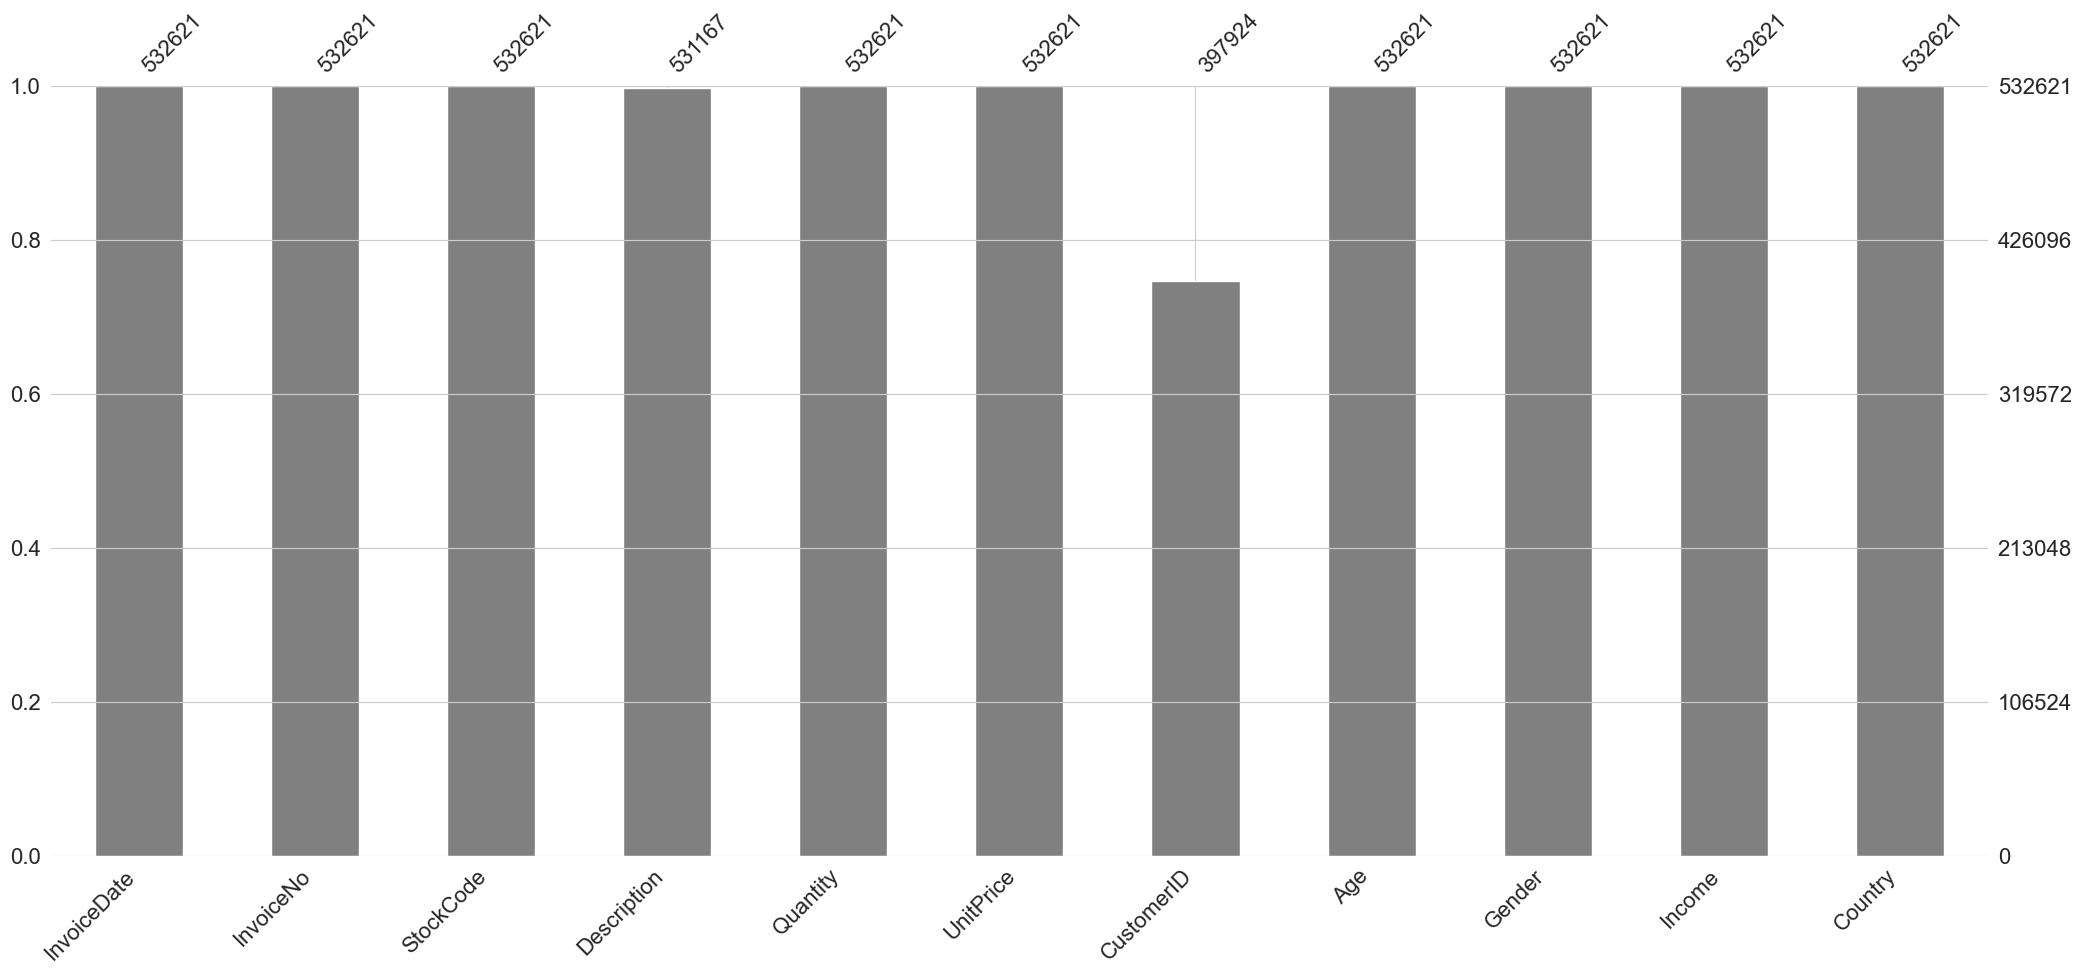

In [12]:
# Checking the null values using MSNO graph
msno.bar(df, color='grey');

In [13]:
# Deleting all the nulls
df = df[pd.notnull(df['CustomerID'])]

In [14]:
df.isnull().sum()

InvoiceDate    0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Age            0
Gender         0
Income         0
Country        0
dtype: int64

In [15]:
# Creating a new column:Total Sales
df['Total_sales'] = df['Quantity'] * df['UnitPrice']

In [16]:
df.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
Quantity,397924.00,13.02,180.42,1.00,2.00,6.00,12.00,80995.00
UnitPrice,397924.00,3.12,22.10,0.00,1.25,1.95,3.75,8142.75
CustomerID,397924.00,15294.32,1713.17,12346.00,13969.00,15159.00,16795.00,18287.00
Age,397924.00,38.16,13.48,15.00,28.00,36.00,45.00,100.00
Income,397924.00,33459.89,6454.88,18662.73,32020.95,32985.76,35186.81,45925.21
Total_sales,397924.00,22.39,309.06,0.00,4.68,11.80,19.80,168469.60


In [17]:
# It seems to be outliers in quantity(80,995) and the total sales (168469) considering the rest of the stats in those fields
#looking with a close eye


def highlight_row(row):
    if row['Quantity'] > 50 and row['Total_sales'] > 10000:
        return ['background-color: yellow'] * len(row)
    return [''] * len(row)

df[(df['Quantity'] > 500) & (df['Total_sales'] > 5000)].head(20).style.apply(highlight_row, axis=1)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Age,Gender,Income,Country,Total_sales
52711,2011-01-11 12:55:00,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.100000,15749.000000,40,female,34027.182265,United Kingdom,6539.400000
61619,2011-01-18 10:01:00,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1.040000,12346.000000,37,female,33199.291996,United Kingdom,77183.600000
160546,2011-04-18 13:20:00,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.100000,15749.000000,40,female,34027.182265,United Kingdom,6539.400000
348325,2011-09-20 11:05:00,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,5.060000,17450.000000,61,female,41757.046621,United Kingdom,7144.720000
540421,2011-12-09 09:15:00,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2.080000,16446.000000,51,female,41446.747462,United Kingdom,168469.600000


In [18]:
# Dropping the record for Inovice no. 581483 and 541431
df.drop([61619,540421], axis=0, inplace=True)

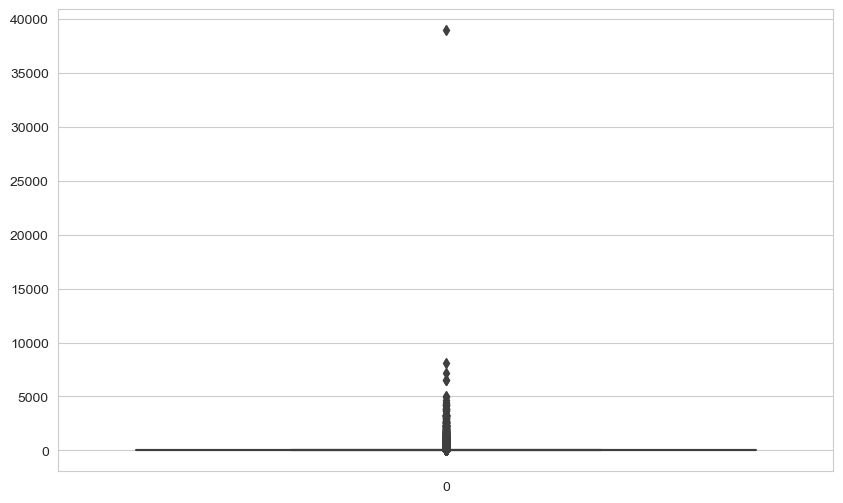

In [19]:
# create box plot
sns.boxplot(df.Total_sales)

# format tick labels
plt.ticklabel_format(style='plain', axis='y')  # style='plain' suppress the scientific notation

# display plot
plt.show()

In [20]:
# sns.distplot(df.Total_sales)
# plt.ticklabel_format(style='plain');

In [21]:
def show_distribution(col):

    # Get statistics
    !pip install termcolor
    from termcolor import colored

    print(colored('Statistical Calculations :', 'red', attrs=['bold']))
    print(colored('-'*26, 'red', attrs=['bold']))
    min_val = col.min()
    max_val = col.max()
    mean_val = col.mean()
    med_val = col.median()
    mod_val = col.mode()[0]

    print(colored('Minimum:{:>7.2f}\nMean:{:>10.2f}\nMedian:{:>8.2f}\nMode:{:>10.2f}\nMaximum:{:>7.2f}\n'.format(min_val,
                                                                                             mean_val,
                                                                                             med_val,
                                                                                             mod_val,
                                                                                             max_val), 'blue', attrs=['bold']))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize=(15, 15))

    # Plot the histogram
    ax[0].hist(col, bins=30)
    ax[0].set_ylabel('Frequency', fontsize=10)

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val,  color='orange',     linestyle='dashed', linewidth=2, label='Minimum')
    ax[0].axvline(x=mean_val, color='lightgreen', linestyle='dashed', linewidth=2, label='Mean')
    ax[0].axvline(x=med_val,  color='cyan',       linestyle='dashed', linewidth=2, label='Median')
    ax[0].axvline(x=mod_val,  color='purple',     linestyle='dashed', linewidth=2, label='Mode')
    ax[0].axvline(x=max_val,  color='red',        linestyle='dashed', linewidth=2, label='Maximum')
    ax[0].legend(loc='upper right')

    # Plot the boxplot
    medianprops = dict(linestyle='-', linewidth=3, color='m')
    boxprops=dict(linestyle='-', linewidth=1.5)
    meanprops={"marker":"d", "markerfacecolor":"blue", "markeredgecolor":"black", "markersize":"10"}
    flierprops={'marker': 'o', 'markersize': 8, 'markerfacecolor': 'fuchsia'}

    ax[1].boxplot(col,
                  vert=False,
                  notch=True,
                  patch_artist=False,
                  medianprops=medianprops,
                  flierprops=flierprops,
                  showmeans=True,
                  meanprops=meanprops)

    ax[1].set_xlabel('value', fontsize=10)

    # Add a title to the Figure
    fig.suptitle('Data Distribution', fontsize=20)

Statistical Calculations :
--------------------------
Minimum:   0.00
Mean:     21.78
Median:   11.80
Mode:     15.00
Maximum:38970.00




[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


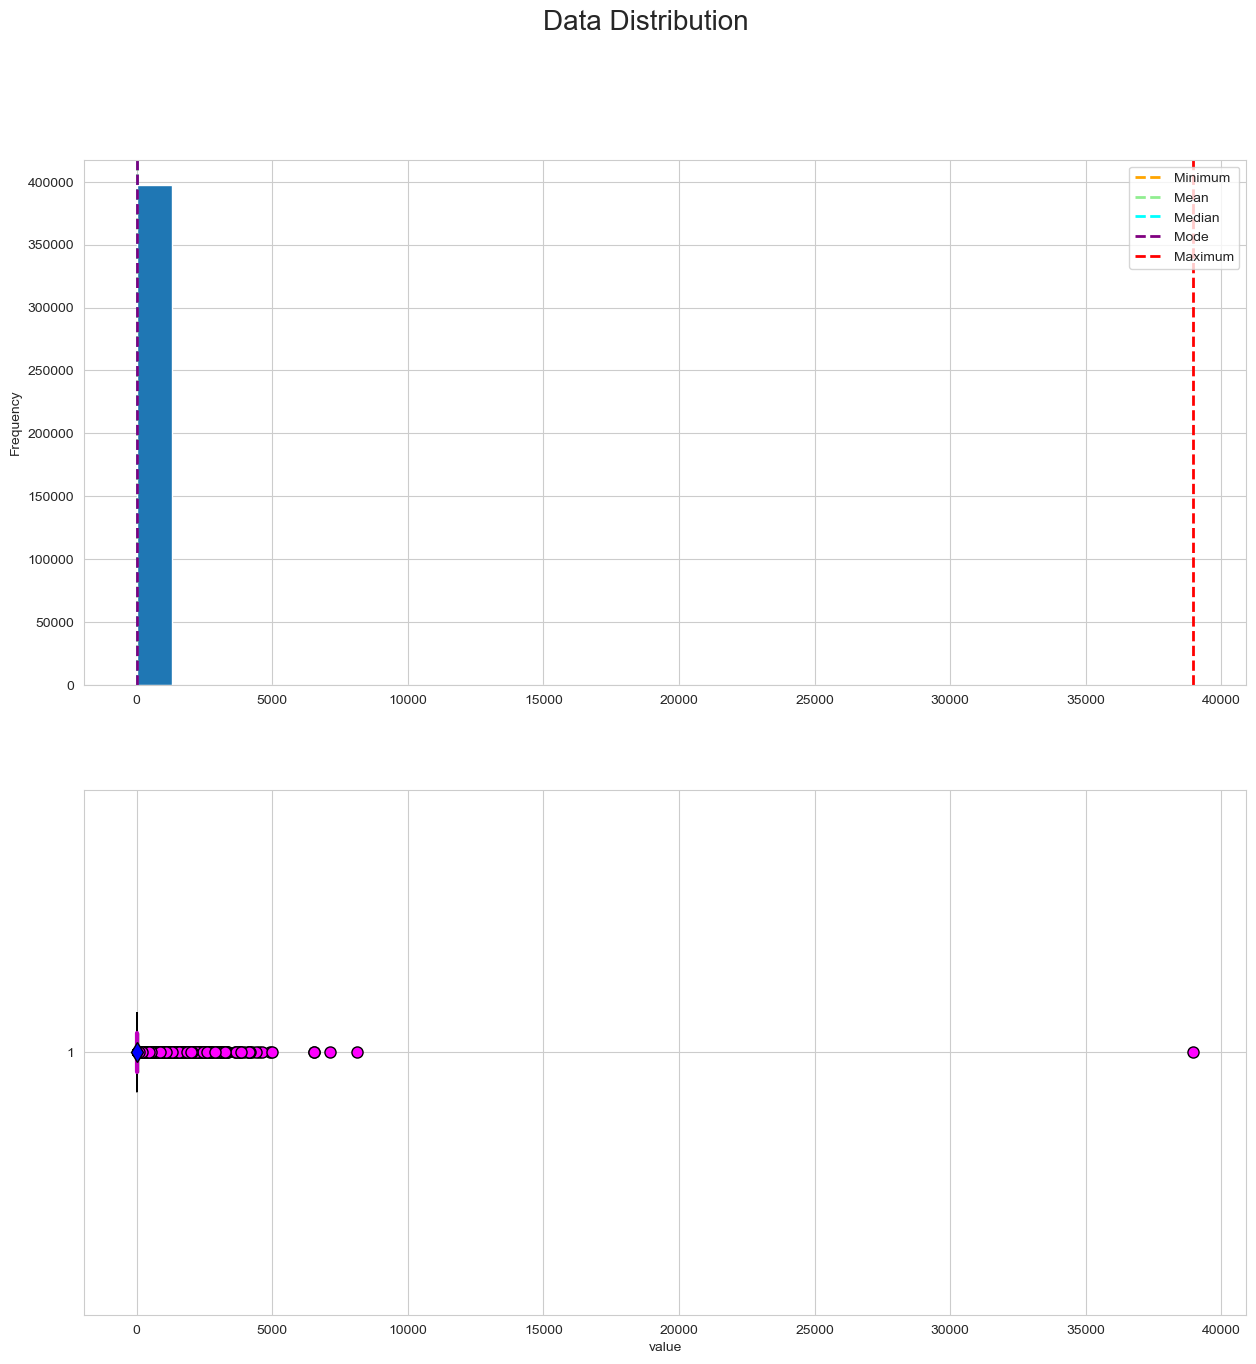

In [22]:
show_distribution(df["Total_sales"])

In [23]:
df[df['Total_sales'] > 5000].head(10).style.apply(highlight_row, axis=1)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Age,Gender,Income,Country,Total_sales
52711,2011-01-11 12:55:00,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.100000,15749.000000,40,female,34027.182265,United Kingdom,6539.400000
160546,2011-04-18 13:20:00,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2.100000,15749.000000,40,female,34027.182265,United Kingdom,6539.400000
173382,2011-05-03 13:46:00,551697,POST,POSTAGE,1,8142.750000,16029.000000,43,female,34737.639594,United Kingdom,8142.750000
222680,2011-06-10 15:28:00,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,649.500000,15098.000000,27,male,32784.251135,United Kingdom,38970.000000
348325,2011-09-20 11:05:00,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,5.060000,17450.000000,61,female,41757.046621,United Kingdom,7144.720000


Statistical Calculations :
--------------------------
Minimum:   0.00
Mean:     21.68
Median:   11.80
Mode:     15.00
Maximum:8142.75




[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


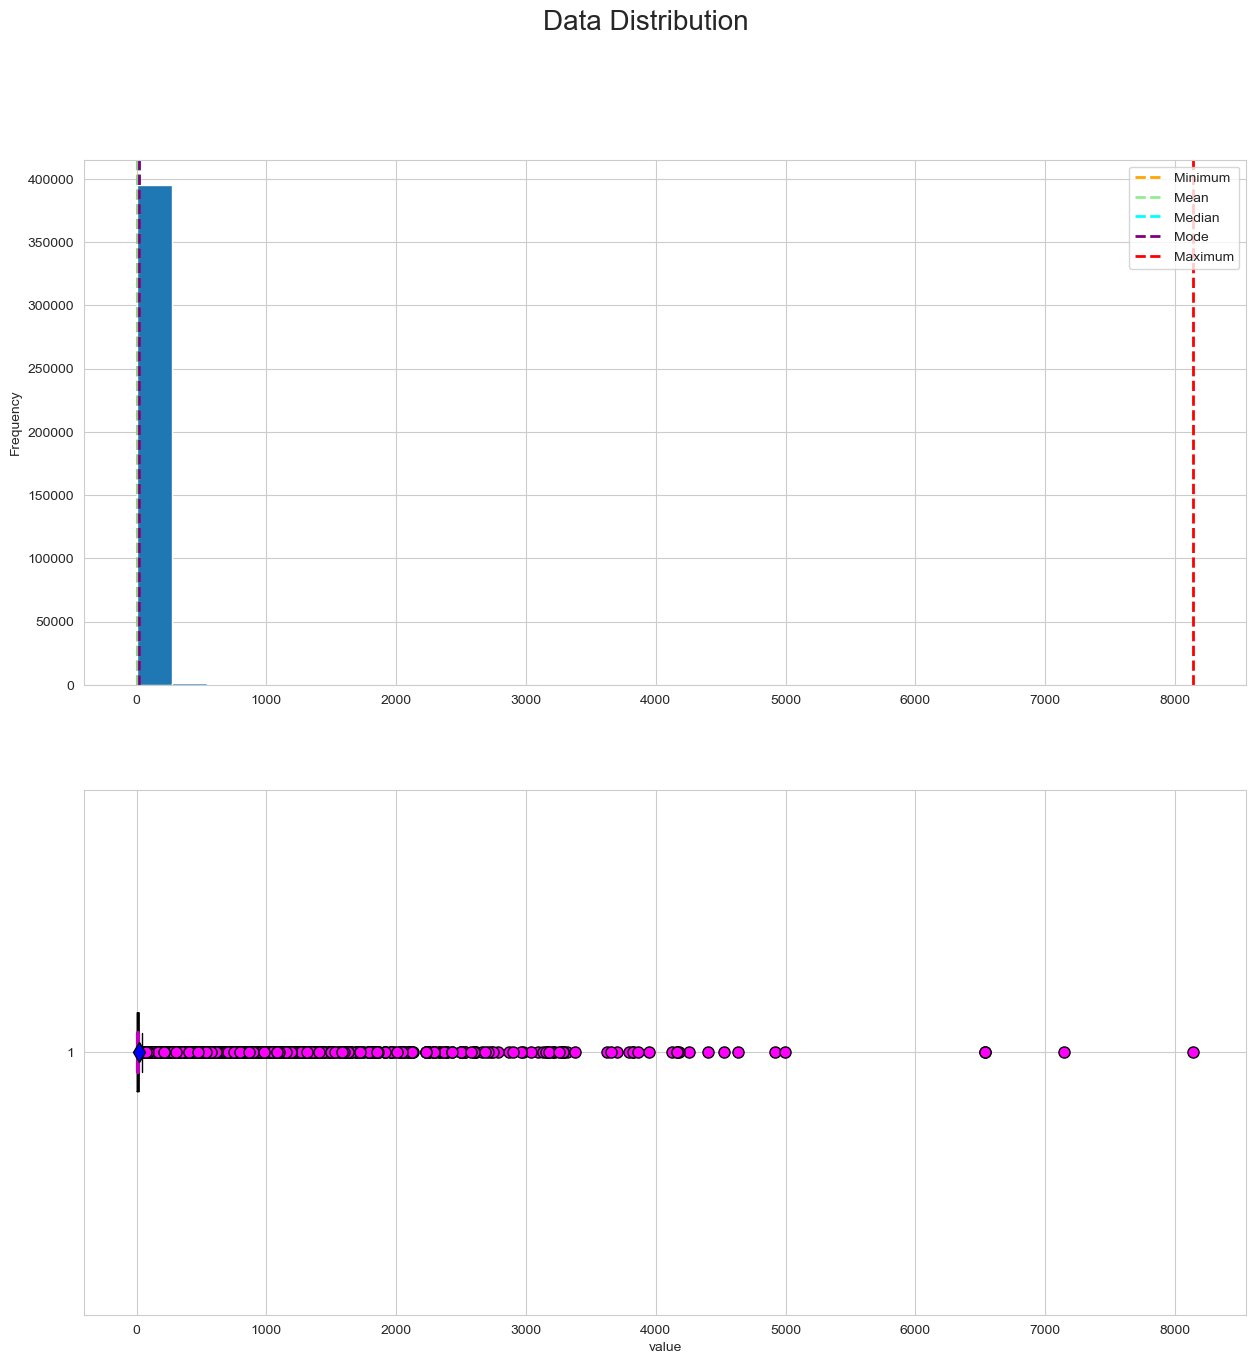

In [24]:
# Dropping the record for Inovice no. 556444 due to its Total_sales value
df.drop(222680, axis=0, inplace=True)

df.describe().transpose()

show_distribution(df["Total_sales"])

In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,397921.00,12.63,47.26,1.00,2.00,6.00,12.00,12540.00
UnitPrice,397921.00,3.11,22.07,0.00,1.25,1.95,3.75,8142.75
CustomerID,397921.00,15294.32,1713.17,12347.00,13969.00,15159.00,16795.00,18287.00
Age,397921.00,38.16,13.48,15.00,28.00,36.00,45.00,100.00
Income,397921.00,33459.87,6454.89,18662.73,32020.95,32985.76,35186.81,45925.21
Total_sales,397921.00,21.68,73.72,0.00,4.68,11.80,19.80,8142.75



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Statistical Calculations :
--------------------------
Minimum:18662.73
Mean:  33459.87
Median:32985.76
Mode:  32904.15
Maximum:45925.21



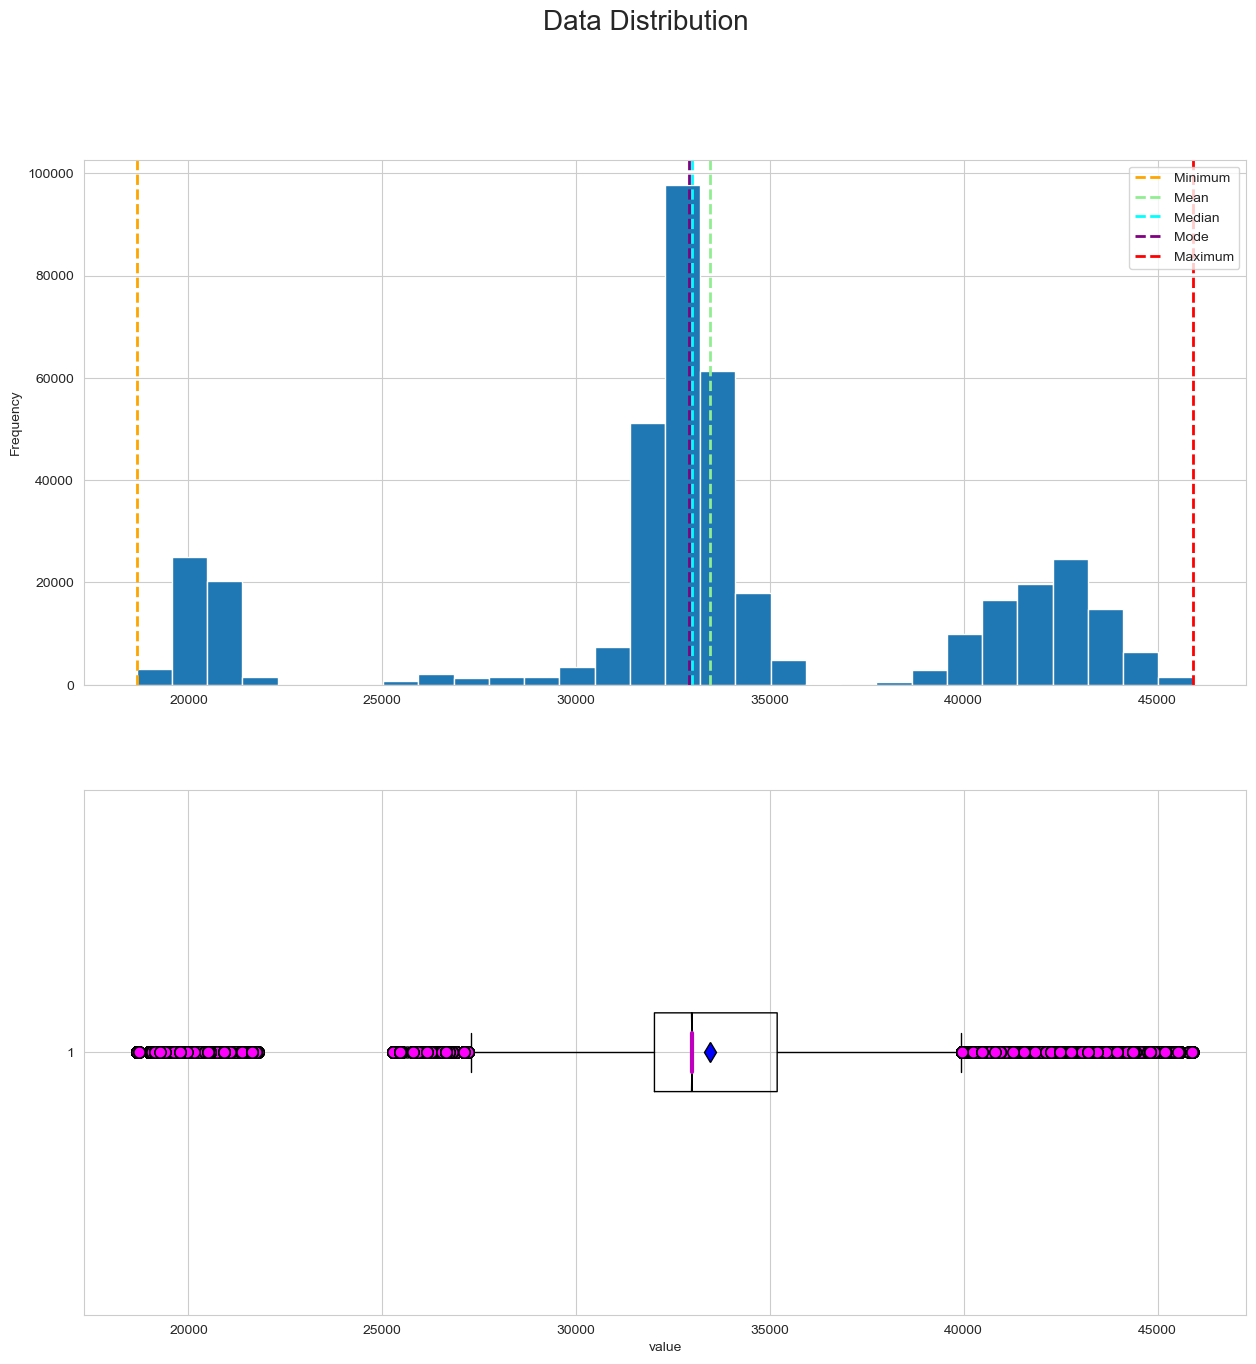

In [26]:
show_distribution(df["Income"])


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Statistical Calculations :
--------------------------
Minimum:  15.00
Mean:     38.16
Median:   36.00
Mode:     28.00
Maximum: 100.00



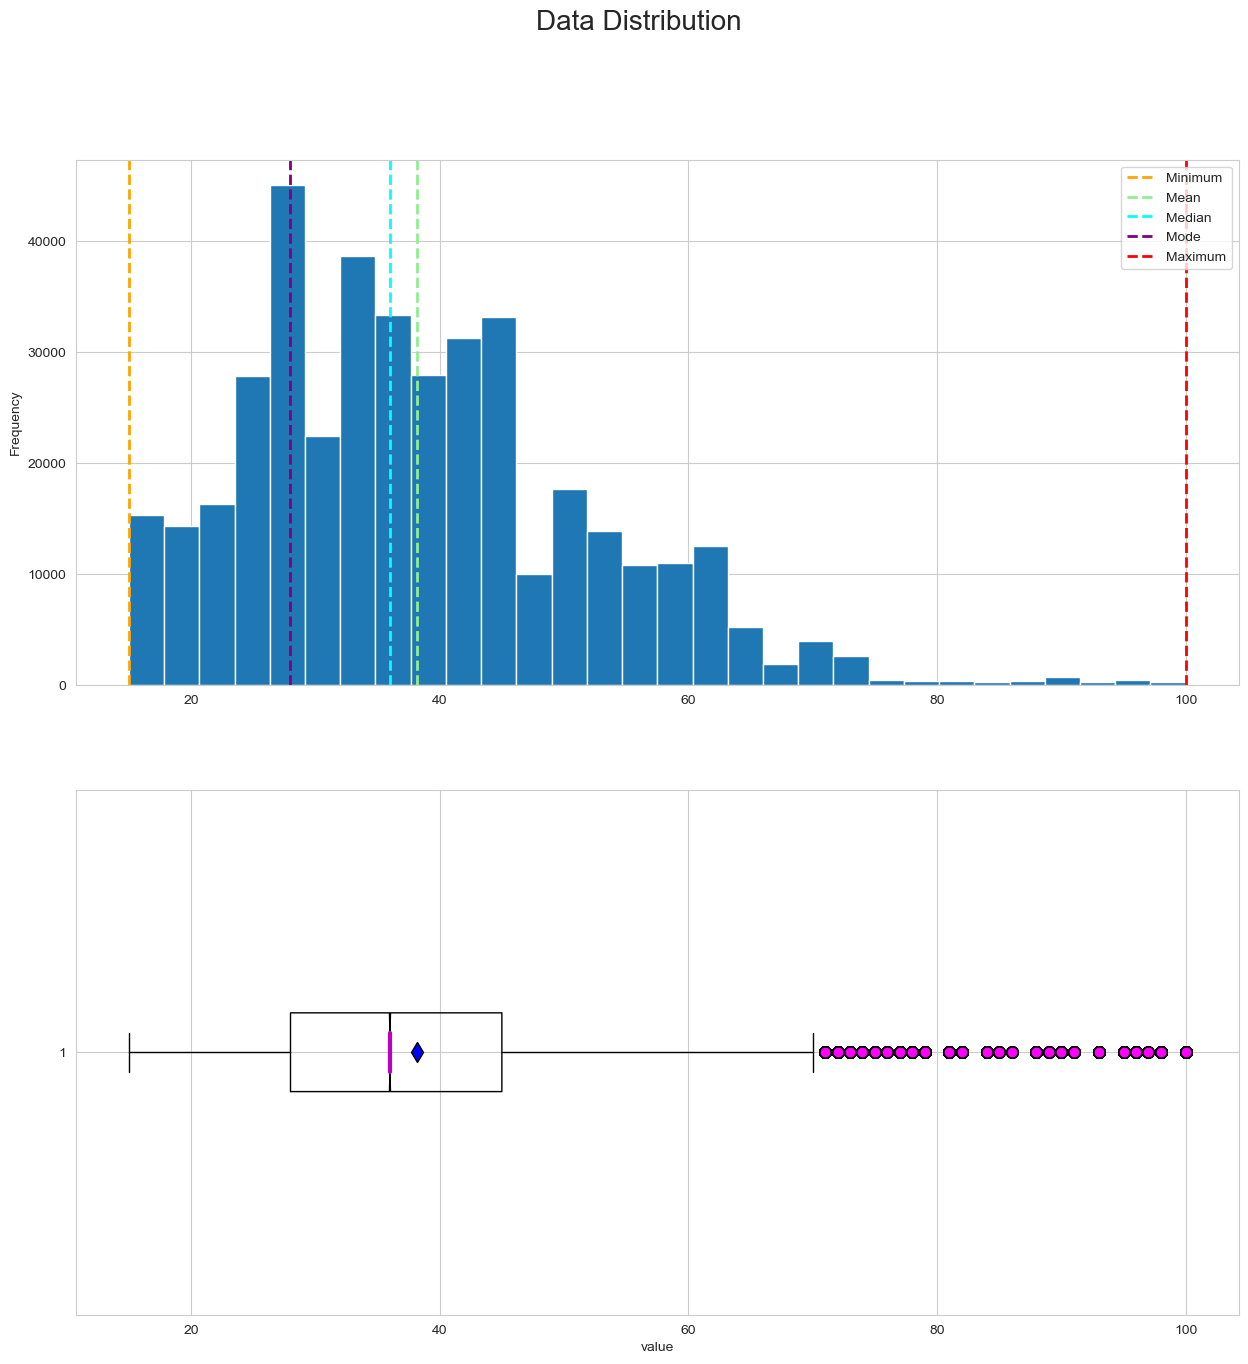

In [27]:
show_distribution(df["Age"])

Statistical Calculations :
--------------------------
Minimum:   1.00
Mean:     12.63
Median:    6.00
Mode:      1.00
Maximum:12540.00




[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


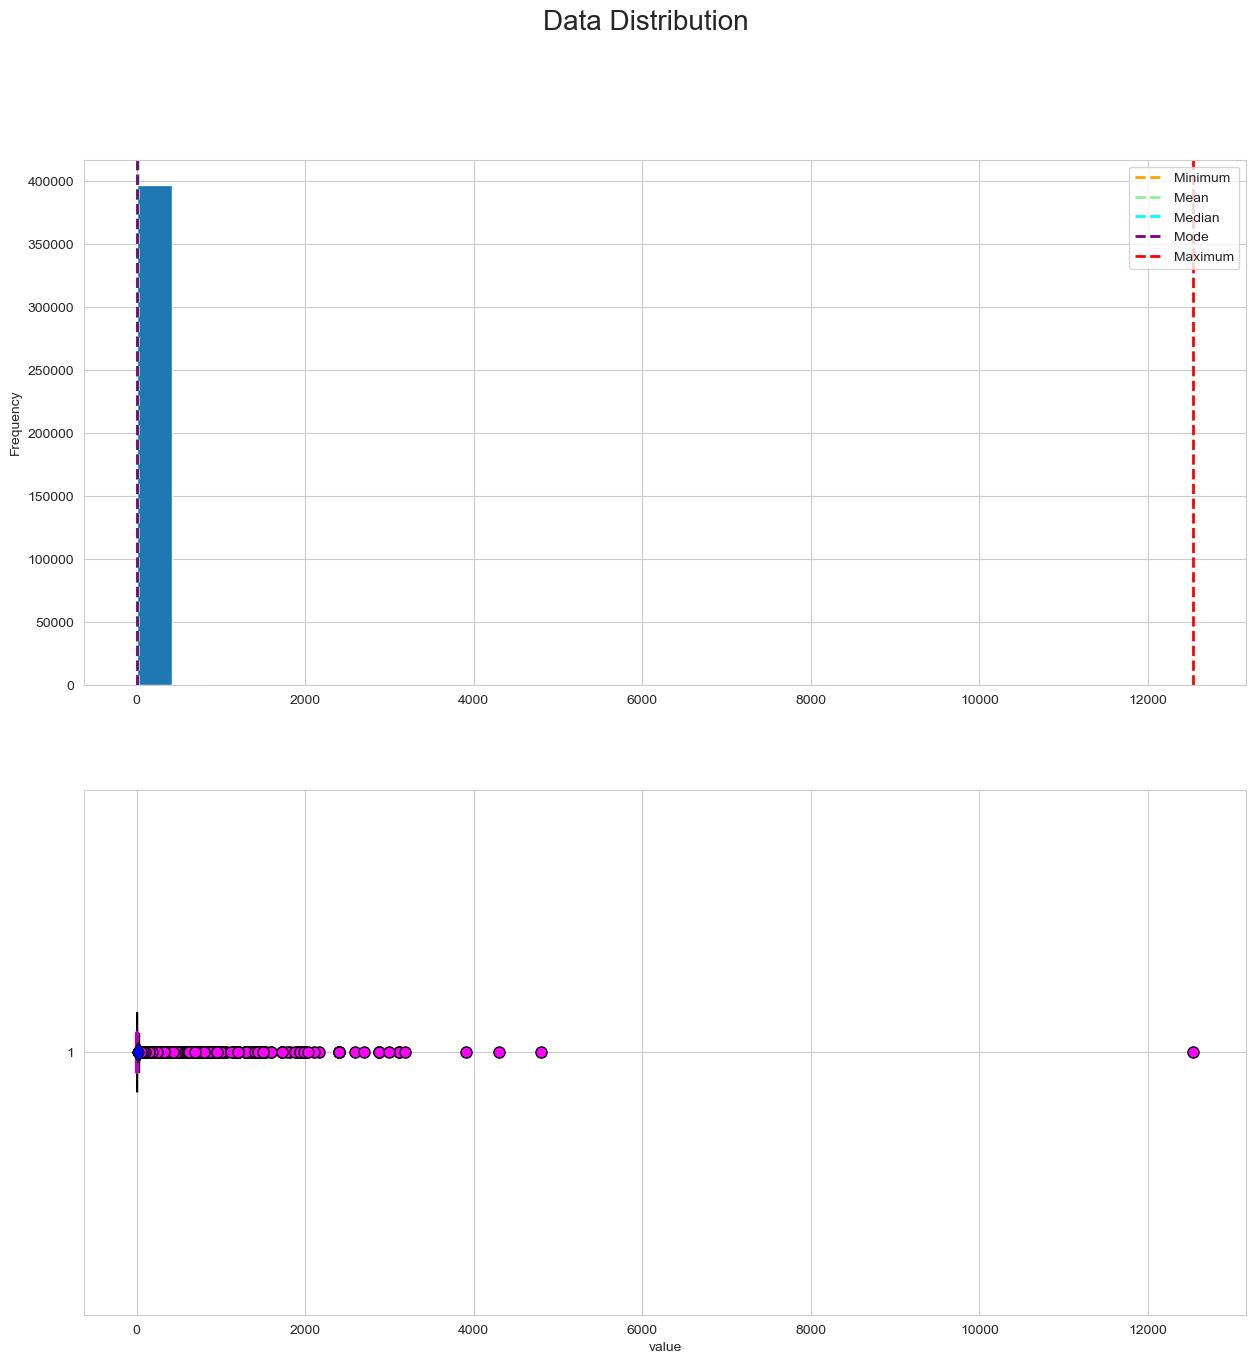

In [28]:
show_distribution(df["Quantity"])

In [29]:
df[df['Quantity'] > 10000].head(10).style.apply(highlight_row, axis=1)

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Age,Gender,Income,Country,Total_sales
502122,2011-11-25 15:57:00,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,0.000000,13256.000000,37,female,33811.498803,United Kingdom,0.000000


In [30]:
# Dropping the record for Inovice no. 578841 due to its Quantity value
df.drop(502122, axis=0, inplace=True)

In [31]:
#Checking for the orders>1
n_orders = df.groupby(['CustomerID']) ['InvoiceNo'].nunique()
greater_than_one = np.sum(n_orders > 1) / df['CustomerID'].nunique()
print(f'{100 * greater_than_one:.2f}% of customers put an order more than once. (considering as retention rate)')

65.58% of customers put an order more than once. (considering as retention rate)


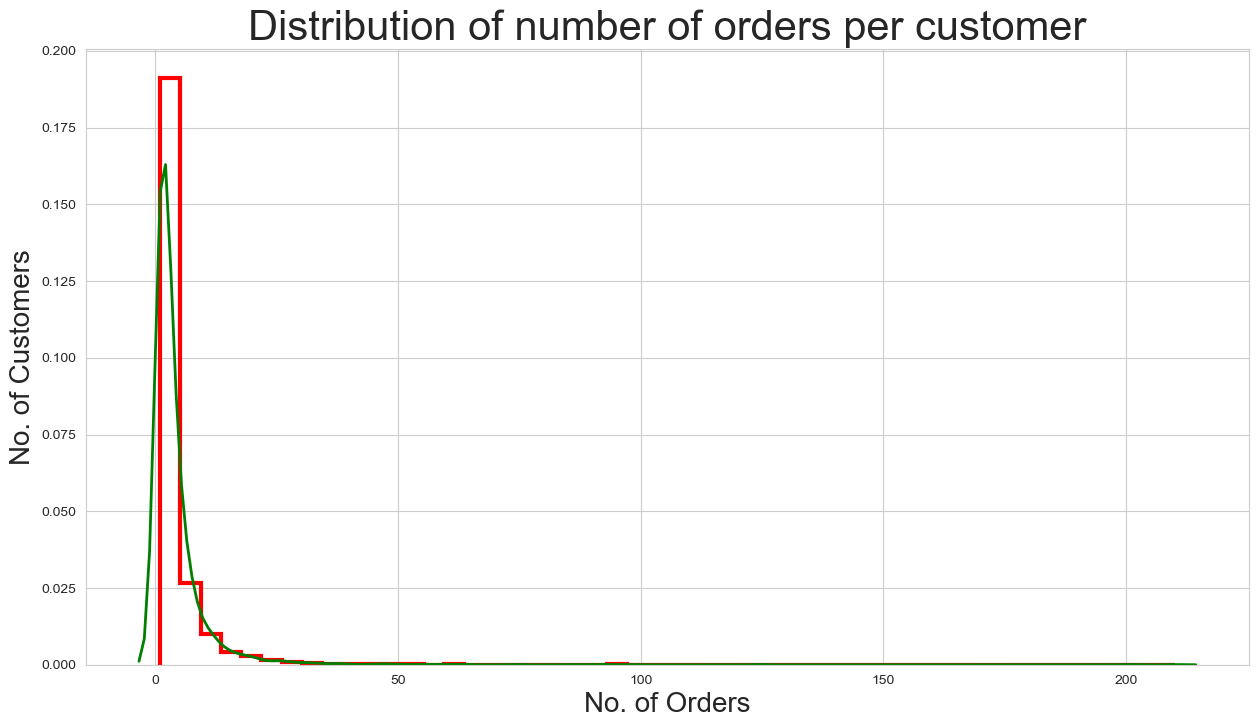

In [32]:
plt.figure(figsize=(15,8))
plt.style.use('_classic_test_patch')
px = sns.distplot(n_orders, hist = True, rug_kws={"color": "r"},
                  kde_kws={"color": "g", "lw": 2, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "r"})

px.set_title('Distribution of number of orders per customer', fontsize = 30)
px.set_xlabel('No. of Orders', fontsize = 20)
px.set_ylabel('No. of Customers', fontsize = 20);

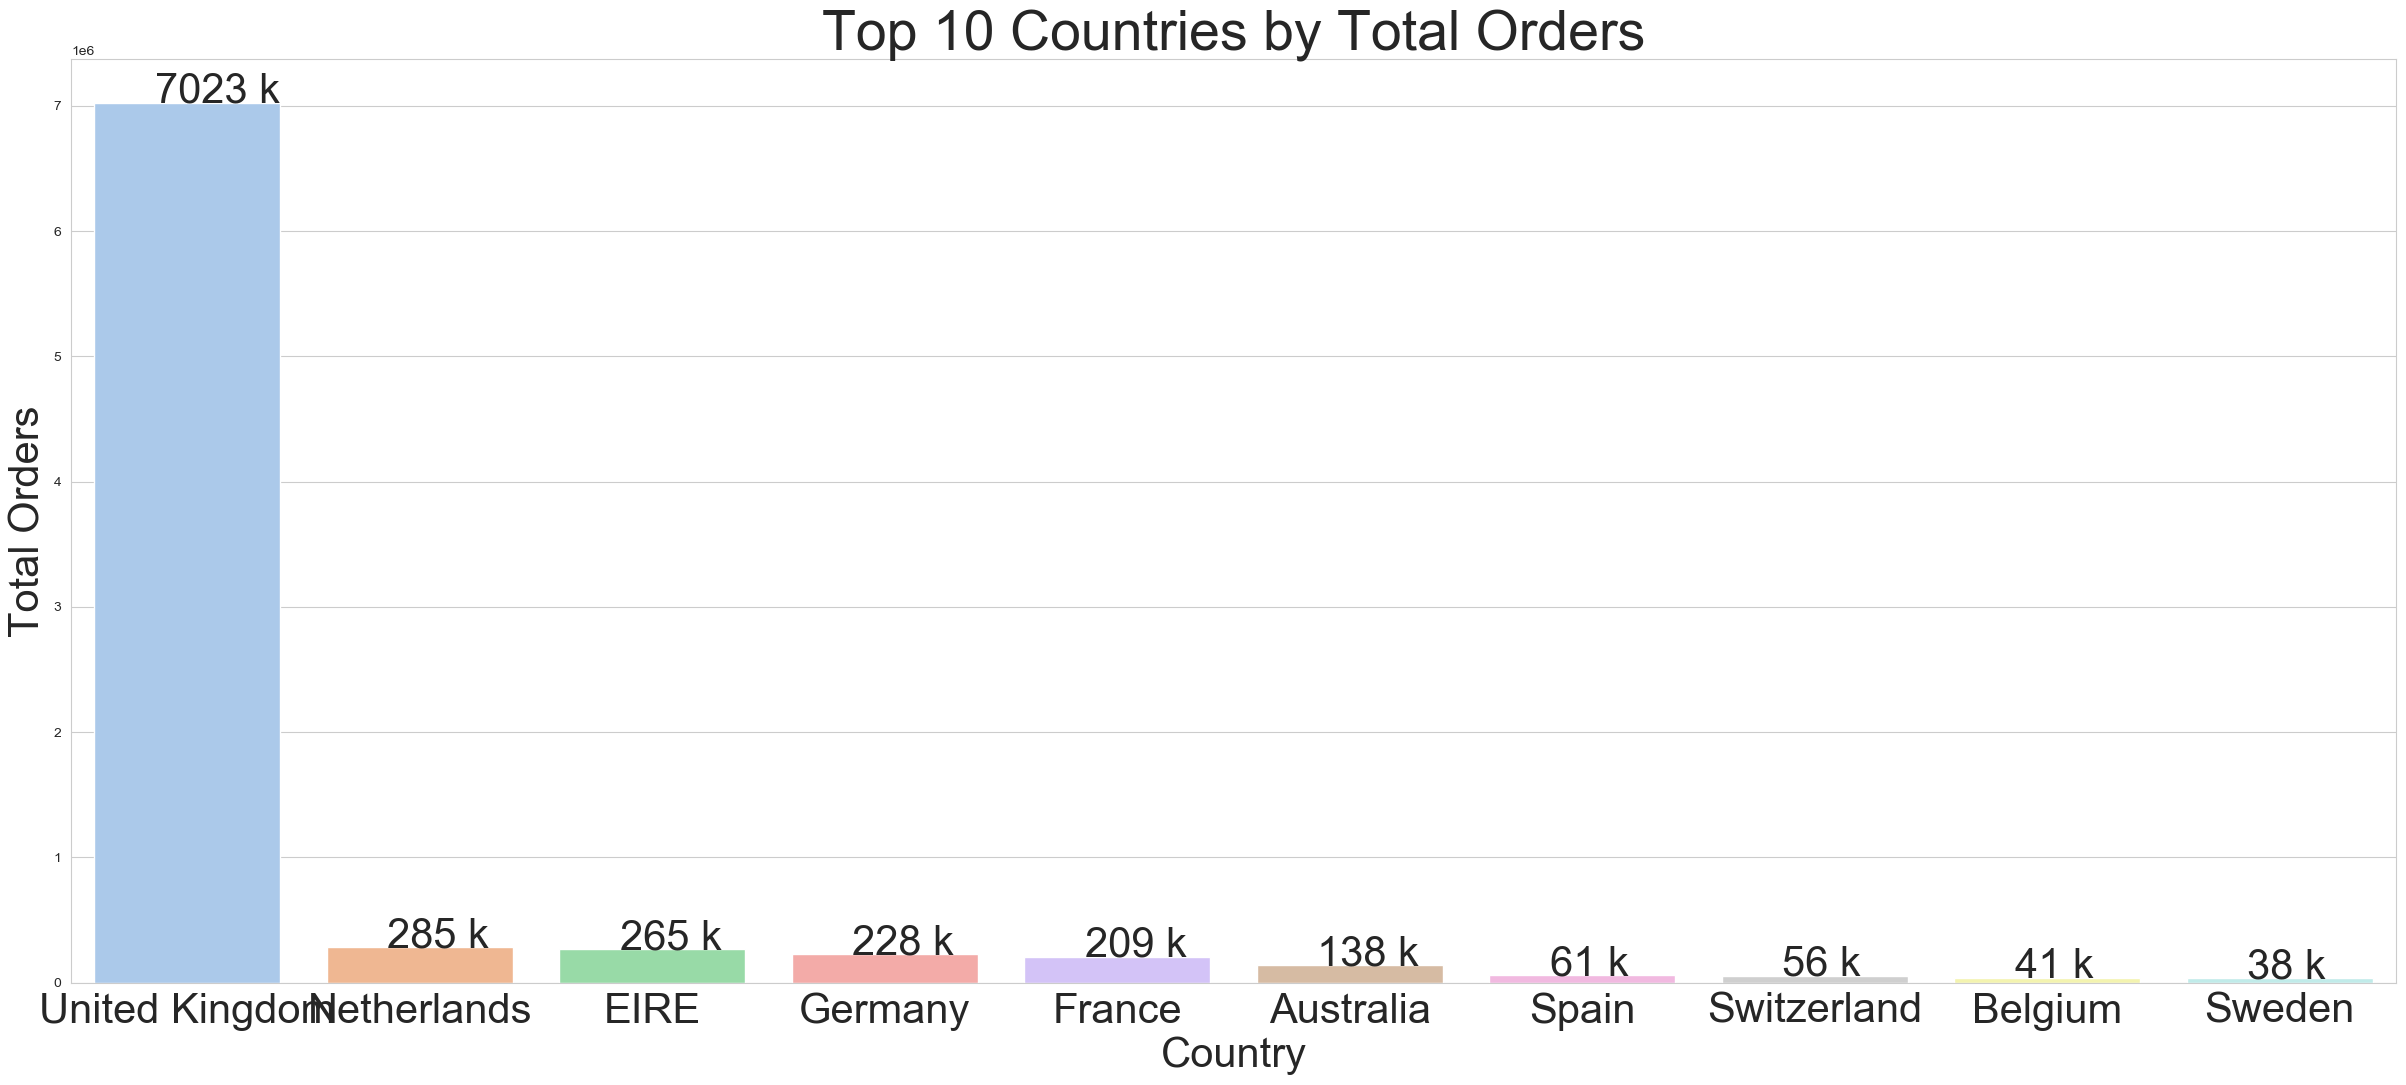

In [33]:
order_country = df.groupby('Country')['Total_sales'].sum().nlargest(10)
plt.figure(figsize=(30,12))
plt.style.use('_classic_test_patch')
px = sns.barplot(x = order_country.index, y = order_country.values, palette = 'pastel')
px.set_xlabel('Country', fontsize = 30)
px.set_ylabel('Total Orders', fontsize = 30)
px.set_title('Top 10 Countries by Total Orders', fontsize = 40)

labels = [ '\n'.join(wrap(l, 15)) for l in order_country.index ]
px.set_xticklabels(labels, fontsize = 30)

value_ticks = []
for x in order_country.values:
    value_ticks.append(str(int(x/1000))+' k')
value_ticks[0]

for a, label in zip(px.patches, value_ticks):
    px.annotate(label, (a.get_x() + 0.26, a.get_height() + 2), fontsize = 30)

In [34]:
top10_country_by_sales = df.groupby('Country')['Total_sales'].sum().nlargest(10)
top10_country_by_sales

Country
United Kingdom   7023768.35
Netherlands       285446.34
EIRE              265545.90
Germany           228867.14
France            209024.05
Australia         138521.31
Spain              61577.11
Switzerland        56443.95
Belgium            41196.34
Sweden             38378.33
Name: Total_sales, dtype: float64

In [35]:
top10_country_by_sales_p = (df.groupby('Country')['Total_sales'].sum() / df['Total_sales'].sum() * 100).sort_values(ascending=False)
top10_country_by_sales_p

Country
United Kingdom         81.42
Netherlands             3.31
EIRE                    3.08
Germany                 2.65
France                  2.42
Australia               1.61
Spain                   0.71
Switzerland             0.65
Belgium                 0.48
Sweden                  0.44
Japan                   0.43
Norway                  0.42
Portugal                0.39
Finland                 0.26
Singapore               0.25
Channel Islands         0.24
Denmark                 0.22
Italy                   0.20
Cyprus                  0.16
Austria                 0.12
Poland                  0.09
Israel                  0.08
Greece                  0.06
Iceland                 0.05
Canada                  0.04
USA                     0.04
Malta                   0.03
Unspecified             0.03
United Arab Emirates    0.02
Lebanon                 0.02
Lithuania               0.02
European Community      0.02
Brazil                  0.01
RSA                     0.01
Czech 

In [36]:
top10_country_by_quantity = df.groupby('Country')['Quantity'].sum().nlargest(10).sort_values(ascending=False)
top10_country_by_quantity

Country
United Kingdom    4101662
Netherlands        200937
EIRE               140525
Germany            119263
France             111472
Australia           84209
Sweden              36083
Switzerland         30083
Spain               27951
Japan               26016
Name: Quantity, dtype: int64

In [37]:
last10_country_by_quantity = df['Quantity'].groupby(df['Country']).agg('sum').sort_values(ascending=True).head(10)
last10_country_by_quantity

Country
Saudi Arabia             80
Bahrain                 260
RSA                     352
Brazil                  356
Lebanon                 386
European Community      499
Lithuania               652
Czech Republic          671
Malta                   970
United Arab Emirates    982
Name: Quantity, dtype: int64

In [38]:
top10_items_by_Tsales = df.groupby('Description').agg({'Total_sales': 'sum', 'Country': 'first'}).nlargest(10, 'Total_sales')
top10_items_by_Tsales

#FAVORITE ITEM: REGENCY CAKESTAND 3 TIER & ORDERED FROM UK

,Total_sales,Country
Description,,
REGENCY CAKESTAND 3 TIER,142592.95,United Kingdom
WHITE HANGING HEART T-LIGHT HOLDER,100448.15,United Kingdom
JUMBO BAG RED RETROSPOT,85220.78,United Kingdom
POSTAGE,77803.96,France
PARTY BUNTING,68844.33,United Kingdom
ASSORTED COLOUR BIRD ORNAMENT,56580.34,United Kingdom
Manual,53779.93,United Kingdom
RABBIT NIGHT LIGHT,51346.20,United Kingdom
CHILLI LIGHTS,46286.51,United Kingdom


In [39]:
ages_by_Tsales = df.groupby(['Age', 'Country'])['Total_sales'].sum().sort_values(ascending=False).head(10)
ages_by_Tsales


Age  Country       
42   United Kingdom   399894.51
43   United Kingdom   293569.05
49   Netherlands      280206.02
29   United Kingdom   255504.46
61   United Kingdom   237966.33
32   United Kingdom   235845.37
40   United Kingdom   234490.93
33   United Kingdom   233159.22
30   United Kingdom   220557.01
31   United Kingdom   214666.28
Name: Total_sales, dtype: float64

In [40]:
gender_by_Tsales = df.groupby(['Gender', 'Country'])['Total_sales'].sum().sort_values(ascending=False).head(10)
gender_by_Tsales

Gender  Country       
female  United Kingdom   4761895.13
male    United Kingdom   2261873.22
female  Netherlands       283451.24
        Germany           151411.50
male    EIRE              143825.06
female  France            141463.33
        Australia         136000.50
        EIRE              121720.84
male    Germany            77455.64
        France             67560.72
Name: Total_sales, dtype: float64

In [41]:
# checkinh the negative values
df[df["Quantity"] < 0] 

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Age,Gender,Income,Country,Total_sales


In [42]:
df[df["Total_sales"]<0]

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Age,Gender,Income,Country,Total_sales


In [43]:
 #Keeping the data for UK only
    
    
df = df[df['Country'] == 'United Kingdom'] 

In [44]:
df[df.astype(str).duplicated(keep=False)]

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Age,Gender,Income,Country,Total_sales
485,2010-12-01 11:45:00,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,4.95,17908.00,37,female,33324.89,United Kingdom,4.95
489,2010-12-01 11:45:00,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2.10,17908.00,37,female,33324.89,United Kingdom,2.10
494,2010-12-01 11:45:00,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,1.25,17908.00,37,female,33324.89,United Kingdom,1.25
517,2010-12-01 11:45:00,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,1.25,17908.00,37,female,33324.89,United Kingdom,1.25
521,2010-12-01 11:45:00,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2.95,17908.00,37,female,33324.89,United Kingdom,2.95
...,...,...,...,...,...,...,...,...,...,...,...,...
541675,2011-12-09 11:34:00,581538,22068,BLACK PIRATE TREASURE CHEST,1,0.39,14446.00,40,female,34113.80,United Kingdom,0.39
541689,2011-12-09 11:34:00,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2.49,14446.00,40,female,34113.80,United Kingdom,2.49
541692,2011-12-09 11:34:00,581538,22992,REVOLVER WOODEN RULER,1,1.95,14446.00,40,female,34113.80,United Kingdom,1.95
541699,2011-12-09 11:34:00,581538,22694,WICKER STAR,1,2.10,14446.00,40,female,34113.80,United Kingdom,2.10


In [45]:
df.to_csv('df_cleaned_copy.csv', index=False)

#                            COHORT ANALYSIS

In [46]:
# Creating a copy of the cleaned data
df_cohort = df.copy()

In [47]:
#Converting string date columns to datetime format
df_cohort['InvoiceDate'] = pd.to_datetime(df_cohort['InvoiceDate'])

In [48]:
#checking the last day of invoice 
df_cohort.groupby('CustomerID')['InvoiceDate'].transform('max').dt.to_period('M').sort_values(ascending=False)

541893    2011-12
413908    2011-12
413906    2011-12
413881    2011-12
413880    2011-12
           ...   
3810      2010-12
3809      2010-12
3808      2010-12
3807      2010-12
0         2010-12
Name: InvoiceDate, Length: 354341, dtype: period[M]

In [49]:
december_2011 = df_cohort[df_cohort['InvoiceDate'].dt.to_period('M') == '2011-12']
days_in_december = pd.Series(december_2011['InvoiceDate'].dt.day.unique())
print(days_in_december)

0    1
1    2
2    4
3    5
4    6
5    7
6    8
7    9
dtype: int32


In [50]:
# Removing the DECEMBER 2011 from df since it has 8 days only.
df_cohort = df_cohort[~(df_cohort['InvoiceDate'] > '2011-12-01')]

In [51]:
# Extracting month and year column from the Invoice date column
df_cohort['invoice_month'] = df_cohort['InvoiceDate'].dt.to_period('M').dt.strftime('%Y-%m')

In [52]:
df_cohort.head()

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Age,Gender,Income,Country,Total_sales,invoice_month
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.00,77,female,26300.79,United Kingdom,15.30,2010-12
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.00,77,female,26300.79,United Kingdom,20.34,2010-12
2,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.00,77,female,26300.79,United Kingdom,22.00,2010-12
3,2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.00,77,female,26300.79,United Kingdom,20.34,2010-12
4,2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.00,77,female,26300.79,United Kingdom,20.34,2010-12


In [53]:
# Import the attrgetter function from the operator module
#to extract the numeric value of the Month attribute of a Pandas Period object.
# The n attribute of a Period object represents the integer value of the period
# (e.g., the month number for a Period object with monthly frequency).

from operator import attrgetter 

In [54]:
# Define the cohort_num function

def cohort_num(df_cohort):
    # Get the first invoice month for each customer
    df_cohort['cohort_month'] = df_cohort.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
    
    # Calculate the number of months between each invoice and the cohort month (sign-up date)
    #simply invoice_month - cohort_month
    
    df_cohort['cohort_num'] = (df_cohort['InvoiceDate'].dt.to_period('M') - df_cohort['cohort_month']).apply(attrgetter('n'))+1
    
    return df_cohort



In [55]:
# Apply the cohort_num function to the df_cohort dataframe
df_cohort = cohort_num(df_cohort)

# Aggregate the data by cohort, invoice month, and cohort number
df_agg = df_cohort.groupby([ 'cohort_month','cohort_num', 'invoice_month']).agg({
    'CustomerID': pd.Series.nunique,
    'Description': pd.Series.nunique,
    'Quantity': np.sum,
    'Total_sales': np.sum})

# Rename the columns
df_agg.rename(columns={
    'CustomerID': 'n_customers',
    'Description': 'n_products'
}, inplace=True)

# Reset the index
#df_agg.reset_index(inplace=True)

df_agg.head(50)

n_customers  n_products  Quantity  \
cohort_month cohort_num invoice_month                                      
2010-12      1          2010-12                815        2380    267771   
             2          2011-01                289        1719    114396   
             3          2011-02                263        1641    107029   
             4          2011-03                304        1775    135222   
             5          2011-04                293        1731    116684   
             6          2011-05                323        1791    139329   
             7          2011-06                291        1801    137655   
             8          2011-07                278        1891    136763   
             9          2011-08                289        1864    160015   
             10         2011-09                325        2026    195720   
             11         2011-10                299        1993    189185   
             12         2011-11                405        2240    239788   
2011-01      1          2011-01                357        1723     89689   
             2          2011-02                 76         899     18129   
             3          2011-03                 93        1026     24164   
             4          2011-04                 84         926     31814   
             5          2011-05                119        1072     31806   
             6          2011-06                 99        1060     28656   
             7          2011-07                 90         983     31999   
             8          2011-08                 87        1037     26033   
             9          2011-09                108        1260     36452   
             10         2011-10                117        1359     36736   
             11         2011-11                127        1591     48310   
2011-02      1          2011-02                340        1697     88233   
             2          2011-03                 64         723     18053   
             3          2011-04                 66         929     29091   
             4          2011-05                 97         948     27856   
             5          2011-06                 98         947     27141   
             6          2011-07                 86         904     22798   
             7          2011-08                 87         895     27574   
             8          2011-09                 96        1037     34321   
             9          2011-10                 90        1179     30726   
             10         2011-11                104        1064     32850   
2011-03      1          2011-03                419        1839     98906   
             2          2011-04                 64         742     15783   
             3          2011-05                109         978     33546   
             4          2011-06                 83         963     21735   
             5          2011-07                 94        1009     32048   
             6          2011-08                 69         934     24312   
             7          2011-09                111        1123     35962   
             8          2011-10                 96        1243     44515   
             9          2011-11                119        1334     45429   
2011-04      1          2011-04                277        1640     67078   
             2          2011-05                 58         693     13188   
             3          2011-06                 56         682     11650   
             4          2011-07                 60         658     14751   
             5          2011-08                 56         722     15271   
             6          2011-09                 61         910     14642   
             7          2011-10                 61         933     17937   
             8          2011-11                 73         937     19022   

                                       Total_sales  
cohort_month cohort_num invoice_m

In [56]:
df_agg.groupby(level=0)['n_customers'].sum() #total number of customers in each cohort 
# (not meaningful since after the first month of ezch coort, the customers are not new customers)

cohort_month
2010-12    4174
2011-01    1357
2011-02    1128
2011-03    1164
2011-04     702
2011-05     571
2011-06     454
2011-07     318
2011-08     239
2011-09     422
2011-10     403
2011-11     297
Freq: M, Name: n_customers, dtype: int64

In [57]:
df_agg.groupby(level=0)['n_customers'].first() #total number of NEW customers in each cohort

cohort_month
2010-12    815
2011-01    357
2011-02    340
2011-03    419
2011-04    277
2011-05    256
2011-06    214
2011-07    169
2011-08    141
2011-09    276
2011-10    324
2011-11    297
Freq: M, Name: n_customers, dtype: int64

In [58]:
df_agg.groupby('invoice_month')['n_customers'].sum() #total number of customers for each month during the year

invoice_month
2010-12     815
2011-01     646
2011-02     679
2011-03     880
2011-04     784
2011-05     962
2011-06     889
2011-07     859
2011-08     834
2011-09    1146
2011-10    1230
2011-11    1505
Name: n_customers, dtype: int64

In [59]:
df_agg.groupby(level=0)['n_customers'].sum().sum() #total number of customers in all cohort(again, not meaningful)

11229

In [60]:
# converting cohort_month to columns and cohort_num to index
df_agg['n_customers'].unstack(0)

cohort_month              2010-12  2011-01  2011-02  2011-03  2011-04  \
cohort_num invoice_month                                                
1          2010-12         815.00      NaN      NaN      NaN      NaN   
           2011-01            NaN   357.00      NaN      NaN      NaN   
           2011-02            NaN      NaN   340.00      NaN      NaN   
           2011-03            NaN      NaN      NaN   419.00      NaN   
           2011-04            NaN      NaN      NaN      NaN   277.00   
           2011-05            NaN      NaN      NaN      NaN      NaN   
           2011-06            NaN      NaN      NaN      NaN      NaN   
           2011-07            NaN      NaN      NaN      NaN      NaN   
           2011-08            NaN      NaN      NaN      NaN      NaN   
           2011-09            NaN      NaN      NaN      NaN      NaN   
           2011-10            NaN      NaN      NaN      NaN      NaN   
           2011-11            NaN      NaN      NaN      NaN      NaN   
2          2011-01         289.00      NaN      NaN      NaN      NaN   
           2011-02            NaN    76.00      NaN      NaN      NaN   
           2011-03            NaN      NaN    64.00      NaN      NaN   
           2011-04            NaN      NaN      NaN    64.00      NaN   
           2011-05            NaN      NaN      NaN      NaN    58.00   
           2011-06            NaN      NaN      NaN      NaN      NaN   
           2011-07            NaN      NaN      NaN      NaN      NaN   
           2011-08            NaN      NaN      NaN      NaN      NaN   
           2011-09            NaN      NaN      NaN      NaN      NaN   
           2011-10            NaN      NaN      NaN      NaN      NaN   
           2011-11            NaN      NaN      NaN      NaN      NaN   
3          2011-02         263.00      NaN      NaN      NaN      NaN   
           2011-03            NaN    93.00      NaN      NaN      NaN   
           2011-04            NaN      NaN    66.00      NaN      NaN   
           2011-05            NaN      NaN      NaN   109.00      NaN   
           2011-06            NaN      NaN      NaN      NaN    56.00   
           2011-07            NaN      NaN      NaN      NaN      NaN   
           2011-08            NaN      NaN      NaN      NaN      NaN   
           2011-09            NaN      NaN      NaN      NaN      NaN   
           2011-10            NaN      NaN      NaN      NaN      NaN   
           2011-11            NaN      NaN      NaN      NaN      NaN   
4          2011-03         304.00      NaN      NaN      NaN      NaN   
           2011-04            NaN    84.00      NaN      NaN      NaN   
           2011-05            NaN      NaN    97.00      NaN      NaN   
           2011-06            NaN      NaN      NaN    83.00      NaN   
           2011-07            NaN      NaN      NaN      NaN    60.00   
           2011-08            NaN      NaN      NaN      NaN      NaN   
           2011-09            NaN      NaN      NaN      NaN      NaN   
           2011-10            NaN      NaN      NaN      NaN      NaN   
           2011-11            NaN      NaN      NaN      NaN      NaN   
5          2011-04         293.00      NaN      NaN      NaN      NaN   
           2011-05            NaN   119.00      NaN      NaN      NaN   
           2011-06            NaN      NaN    98.00      NaN      NaN   
           2011-07            NaN      NaN      NaN    94.00      NaN   
           2011-08            NaN      NaN      NaN      NaN    56.00   
           2011-09            NaN      NaN      NaN      NaN      NaN   
           2011-10            NaN      NaN      NaN      NaN      NaN   
           2011-11            NaN      NaN      NaN      NaN      NaN   
6          2011-05         323.00      NaN      NaN      NaN      NaN   
           2011-06            NaN    99.00      NaN      NaN      NaN   
           2011-07            NaN      NaN    86.00      N

In [61]:
df_agg['n_customers'].unstack(0).divide(df_agg.groupby(level=0)['n_customers'].sum(), axis = 1) #percent%

cohort_month              2010-12  2011-01  2011-02  2011-03  2011-04  \
cohort_num invoice_month                                                
1          2010-12           0.20      NaN      NaN      NaN      NaN   
           2011-01            NaN     0.26      NaN      NaN      NaN   
           2011-02            NaN      NaN     0.30      NaN      NaN   
           2011-03            NaN      NaN      NaN     0.36      NaN   
           2011-04            NaN      NaN      NaN      NaN     0.39   
           2011-05            NaN      NaN      NaN      NaN      NaN   
           2011-06            NaN      NaN      NaN      NaN      NaN   
           2011-07            NaN      NaN      NaN      NaN      NaN   
           2011-08            NaN      NaN      NaN      NaN      NaN   
           2011-09            NaN      NaN      NaN      NaN      NaN   
           2011-10            NaN      NaN      NaN      NaN      NaN   
           2011-11            NaN      NaN      NaN      NaN      NaN   
2          2011-01           0.07      NaN      NaN      NaN      NaN   
           2011-02            NaN     0.06      NaN      NaN      NaN   
           2011-03            NaN      NaN     0.06      NaN      NaN   
           2011-04            NaN      NaN      NaN     0.05      NaN   
           2011-05            NaN      NaN      NaN      NaN     0.08   
           2011-06            NaN      NaN      NaN      NaN      NaN   
           2011-07            NaN      NaN      NaN      NaN      NaN   
           2011-08            NaN      NaN      NaN      NaN      NaN   
           2011-09            NaN      NaN      NaN      NaN      NaN   
           2011-10            NaN      NaN      NaN      NaN      NaN   
           2011-11            NaN      NaN      NaN      NaN      NaN   
3          2011-02           0.06      NaN      NaN      NaN      NaN   
           2011-03            NaN     0.07      NaN      NaN      NaN   
           2011-04            NaN      NaN     0.06      NaN      NaN   
           2011-05            NaN      NaN      NaN     0.09      NaN   
           2011-06            NaN      NaN      NaN      NaN     0.08   
           2011-07            NaN      NaN      NaN      NaN      NaN   
           2011-08            NaN      NaN      NaN      NaN      NaN   
           2011-09            NaN      NaN      NaN      NaN      NaN   
           2011-10            NaN      NaN      NaN      NaN      NaN   
           2011-11            NaN      NaN      NaN      NaN      NaN   
4          2011-03           0.07      NaN      NaN      NaN      NaN   
           2011-04            NaN     0.06      NaN      NaN      NaN   
           2011-05            NaN      NaN     0.09      NaN      NaN   
           2011-06            NaN      NaN      NaN     0.07      NaN   
           2011-07            NaN      NaN      NaN      NaN     0.09   
           2011-08            NaN      NaN      NaN      NaN      NaN   
           2011-09            NaN      NaN      NaN      NaN      NaN   
           2011-10            NaN      NaN      NaN      NaN      NaN   
           2011-11            NaN      NaN      NaN      NaN      NaN   
5          2011-04           0.07      NaN      NaN      NaN      NaN   
           2011-05            NaN     0.09      NaN      NaN      NaN   
           2011-06            NaN      NaN     0.09      NaN      NaN   
           2011-07            NaN      NaN      NaN     0.08      NaN   
           2011-08            NaN      NaN      NaN      NaN     0.08   
           2011-09            NaN      NaN      NaN      NaN      NaN   
           2011-10            NaN      NaN      NaN      NaN      NaN   
           2011-11            NaN      NaN      NaN      NaN      NaN   
6          2011-05           0.08      NaN      NaN      NaN      NaN   
           2011-06            NaN     0.07      NaN      NaN      NaN   
           2011-07            NaN      NaN     0.08      N

In [62]:
# plt.style.available
# import matplotlib.pyplot as plt

# for cmap in plt.colormaps():
#     print(cmap)


In [63]:
# reseting the index of the DataFrame to default integer index.
df_agg.reset_index(inplace=True)

#seting a new multi-level index with the 'cust_cohort' and 'cohort_num' columns.
df_agg.set_index([ 'cohort_month','cohort_num'], inplace=True)


#number of unique customers in each cohort.
# calculating the size of each cohort.
cohort_size = df_agg.groupby(level=0)['n_customers'].first()

# pivoting the df_agg dataframe so that the cohort month becomes the columns and the cohort number becomes the index,
# and then dividing each column by the corresponding value in the cohort_size series. 
retention_rate = df_agg['n_customers'].unstack(0).divide(cohort_size, axis = 1)

# retention_rate = df_agg['n_customers'].pivot(index='cohort_month',columns='cohort_num',values='n_customers')

In [64]:
retention_rate

cohort_month,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11
cohort_num,,,,,,,,,,,,
1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2,0.35,0.21,0.19,0.15,0.21,0.19,0.18,0.18,0.23,0.23,0.24,NaN
3,0.32,0.26,0.19,0.26,0.20,0.17,0.14,0.20,0.23,0.30,NaN,NaN
4,0.37,0.24,0.29,0.20,0.22,0.17,0.24,0.23,0.24,NaN,NaN,NaN
5,0.36,0.33,0.29,0.22,0.20,0.21,0.24,0.28,NaN,NaN,NaN,NaN
6,0.40,0.28,0.25,0.16,0.22,0.23,0.32,NaN,NaN,NaN,NaN,NaN
7,0.36,0.25,0.26,0.26,0.22,0.27,NaN,NaN,NaN,NaN,NaN,NaN
8,0.34,0.24,0.28,0.23,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.35,0.30,0.26,0.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# plt.figure(figsize=(15, 8))
# plt.title('Retention rates')
# sns.heatmap(data=retention_rate,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
# plt.show()

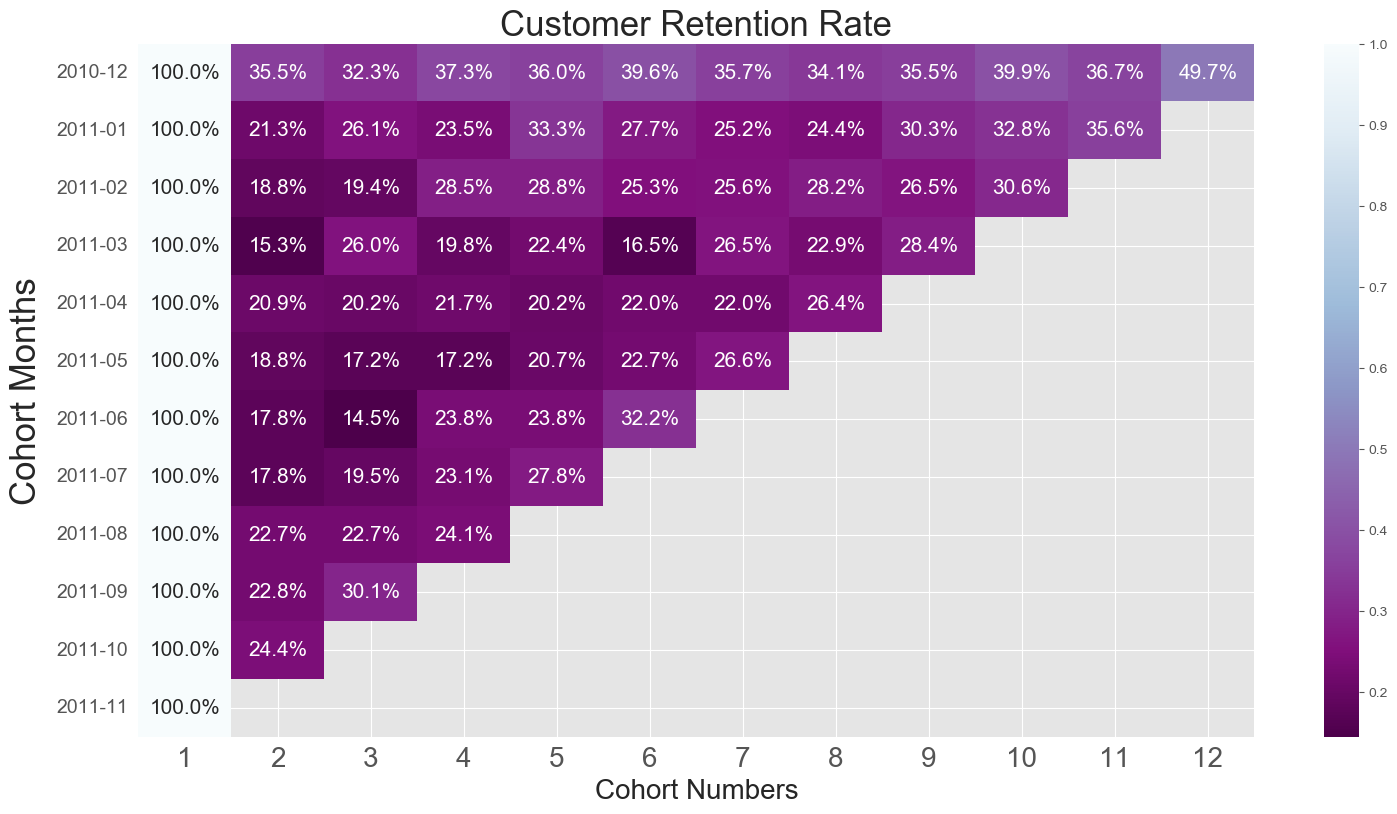

In [66]:
plt.figure(figsize=(18,9))
plt.style.use('ggplot')
ax = sns.heatmap(retention_rate.T, annot=True, cmap='BuPu_r', fmt='.1%', annot_kws={'size': 15})
ax.set_xlabel('Cohort Numbers', fontsize = 20)
ax.set_ylabel('Cohort Months', fontsize = 25, labelpad=10)
ax.set_xticklabels(labels = [1,2,3,4,5,6,7,8,9,10,11,12], size = '20')
ax.set_title('Customer Retention Rate', fontsize = 25)
# ax.set_xticklabels(labels = df_cohort['cohort_month'], size = '18');
ax.set_yticklabels(labels=df_agg.index.get_level_values(0).unique().strftime('%Y-%m'), size='14')
ax.tick_params(axis='y', rotation=0);


# # Add total sales values to left side of heatmap
# ax.text(-0.5, 0.5, f'Total_sales\n{Total_sales:.2f}', va='center', ha='center', fontsize=15, rotation=90)

# # Add average retention rate value to bottom of heatmap
# ax.text(6.5, -0.5, f'Average Retention Rate\n{avg_retention_rate:.2%}', va='center', ha='center', fontsize=15)

In [67]:
# fig, ax = plt.subplots()
# im = ax.imshow(retention_rate)


>>The first cohort (2010–12) seems performed better compared to the rest of the groups regarding the retention rate between 30-50%

>>Second cohort: 20-30%
>>Fourth Cohort: ~25%

>>However, the size of the cohorts must be take into consideration where first cohort size is 12!

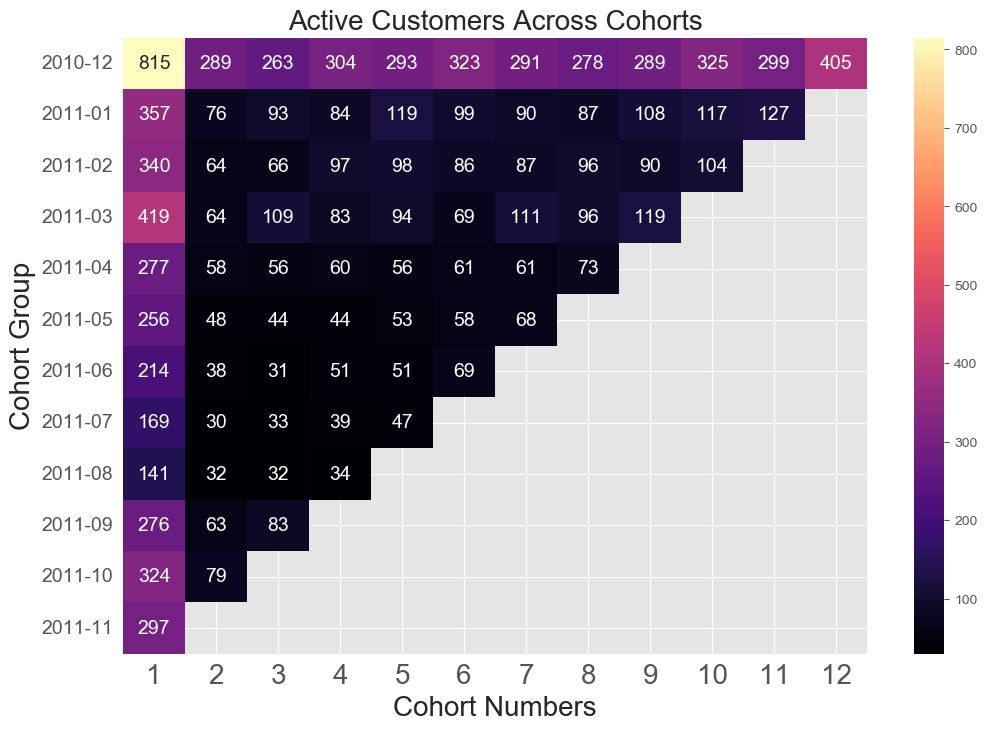

In [68]:
unstacked_cust = df_agg['n_customers'].unstack(0)
plt.figure(figsize=(12,8))
plt.style.use('_classic_test_patch')
ax = sns.heatmap(unstacked_cust.T, annot = True, cmap='magma', fmt = 'g', annot_kws={'size': 14})
ax.set_xlabel('Cohort Numbers', fontsize = 20)
ax.set_ylabel('Cohort Group', fontsize = 20)
#ax.set_xticklabels(labels = df_cohort['cust_cohort'], size = '18')
ax.set_yticklabels(labels=df_agg.index.get_level_values(0).unique().strftime('%Y-%m'), size='14')
ax.tick_params(axis='y', rotation=0);
ax.set_xticklabels(labels = [1,2,3,4,5,6,7,8,9,10,11,12], size = '20')
ax.set_title('Active Customers Across Cohorts', fontsize = 20);

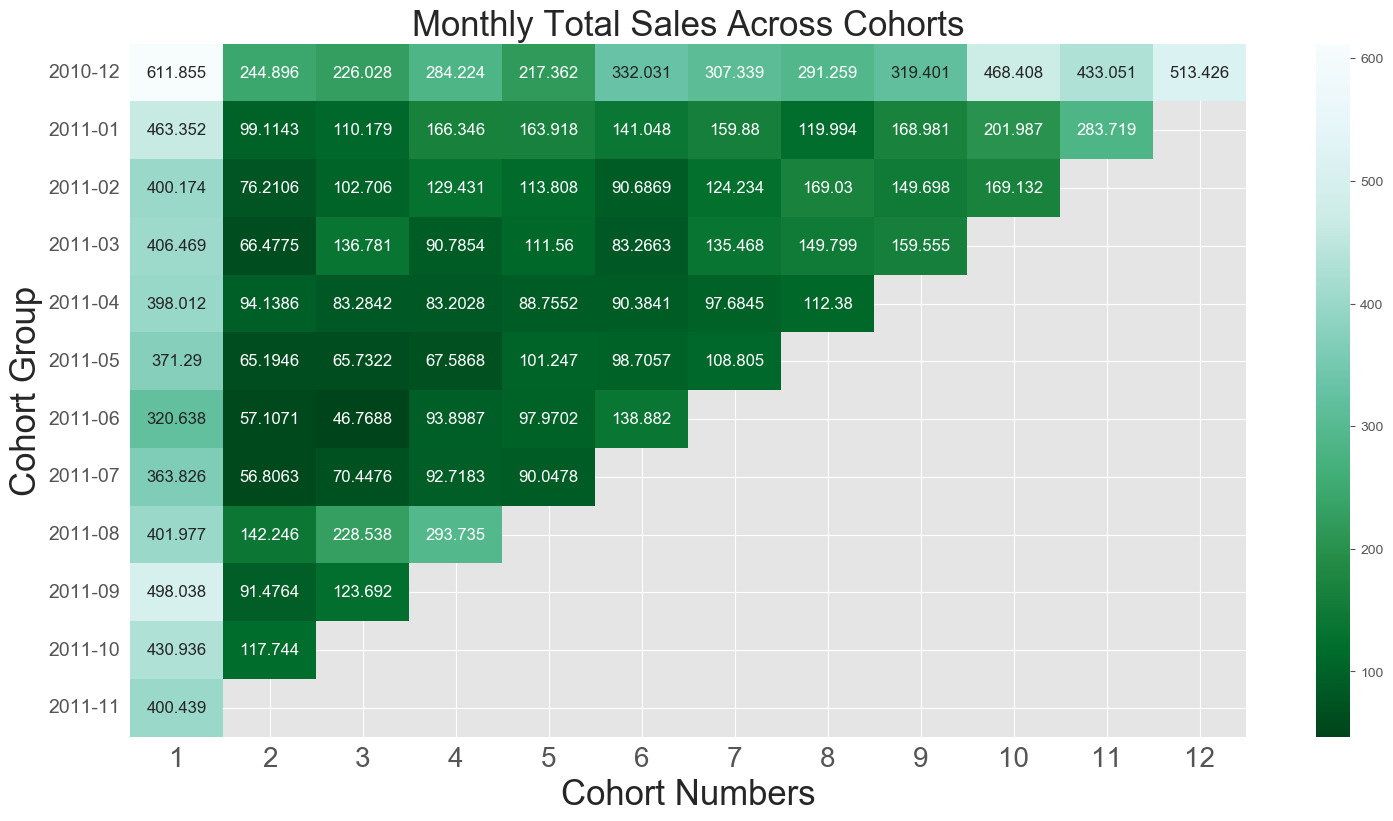

In [69]:
df_agg.reset_index(inplace=True)
df_agg.set_index(['cohort_month', 'cohort_num'], inplace=True)

cohort_size = df_agg.groupby(level=0)['n_customers'].first()
retention_rate = df_agg['Total_sales'].unstack(0).divide(cohort_size, axis = 1)

plt.figure(figsize=(18,9))
plt.style.use('ggplot')
ax = sns.heatmap(retention_rate.T, annot=True,cmap='BuGn_r', fmt='g', annot_kws={'size': 12})
ax.set_xlabel('Cohort Numbers', fontsize = 25)
ax.set_ylabel('Cohort Group', fontsize = 25)
ax.set_yticklabels(labels=df_agg.index.get_level_values(0).unique().strftime('%Y-%m'), size='14')
ax.tick_params(axis='y', rotation=0);
ax.set_xticklabels(labels=[1,2,3,4,5,6,7,8,9,10,11,12], size='20')
ax.set_title('Monthly Total Sales Across Cohorts', fontsize=25);

**RFM (Recency Frequency Monetary) model**
>>Recency: the number of days since a customer made the last purchase.>>

>>Frequency: the number of purchase in a given period.>>

>>Monetary:the total amount of money a customer spent in a given period.



In [70]:
# Creating a copy of the original dataframe which will have records of December 2011 as well
rfm_df = df.copy(deep=True)
# deep=True ensures that the copied DataFrame is completely independent of the original DataFrame, 
# and any changes made to one will not affect the other.

In [71]:
# Checking for duplicates
rfm_df.duplicated().sum()

5118

In [72]:
# Dropping all the duplicated records
rfm_df.drop_duplicates(inplace = True)

In [73]:
rfm_df.shape

(349223, 12)

In [74]:
# The last transaction date(12-09-2011) will be used as the current date to calculate the recency
#import datetime as dt
last_date = df['InvoiceDate'].max()
last_date

'2011-12-09 12:49:00'

In [75]:
import datetime as dt


In [76]:
# Convert 'InvoiceDate' column to datetime object
rfm_df['InvoiceDate'] = pd.to_datetime(rfm_df['InvoiceDate'])

#The last day of purchase in total is 09 DEC, 2011.As it happens, it is 10 DEC (inEUR)
real_last_date = rfm_df['InvoiceDate'].max() + dt.timedelta(days=1)
real_last_date


# Convert 'last_date' variable to datetime object
real_last_date = pd.to_datetime(real_last_date)
real_last_date

Timestamp('2011-12-10 12:49:00')

In [77]:
rfm_df.head()

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Age,Gender,Income,Country,Total_sales
0,2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.00,77,female,26300.79,United Kingdom,15.30
1,2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.00,77,female,26300.79,United Kingdom,20.34
2,2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.00,77,female,26300.79,United Kingdom,22.00
3,2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.00,77,female,26300.79,United Kingdom,20.34
4,2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.00,77,female,26300.79,United Kingdom,20.34


In [78]:
# calculating the number of days between each customer's last purchase and the last_date.
# rfm_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (last_date - x.max()).days}) 

In [79]:
RFM_table = rfm_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (real_last_date - x.max()).days, # Recency
                                        'InvoiceNo': 'count',               # Frequency
                                        'Total_sales': 'sum',                # Monetary Value
                                        'Age' : 'mean',
                                        'Income': 'mean',
                                        'Gender': 'first'})

RFM_table.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'Total_sales': 'Monetary'}, inplace=True)

RFM_table.head(10)

,Recency,Frequency,Monetary,Age,Income,Gender
CustomerID,,,,,,
12747.00,2,103,4196.01,19.00,19384.60,female
12748.00,1,4413,33053.19,29.00,31798.78,male
12749.00,4,199,4090.88,32.00,33590.92,female
12820.00,3,59,942.34,59.00,40936.15,male
12821.00,214,6,92.72,29.00,32874.47,female
12822.00,71,46,948.88,54.00,43404.17,female
12823.00,75,5,1759.50,49.00,43662.68,male
12824.00,60,25,397.12,28.00,31572.48,female
12826.00,3,91,1474.72,42.00,33507.44,female


In [80]:
RFM_table.reset_index(inplace = True)

In [81]:
#specifying the quantiles as its index and the columns of RFM_table as its columns
# quartiles = RFM_table.quantile(q=[0.25,0.50,0.75])


quartiles = RFM_table[['Recency', 'Frequency', 'Monetary']].quantile(q=[0.25, 0.5, 0.75])
quartiles

,Recency,Frequency,Monetary
0.25,18.00,17.00,298.06
0.50,51.00,40.00,643.90
0.75,143.00,98.00,1566.11


In [82]:
#converting them into a dictionary
quartiles = quartiles.to_dict()
quartiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 143.0},
 'Frequency': {0.25: 17.0, 0.5: 40.0, 0.75: 98.0},
 'Monetary': {0.25: 298.055, 0.5: 643.9, 0.75: 1566.105}}

In [83]:
RFM_table_copy = RFM_table.copy()

**SEGMENTATION**

>>>>
Assigning a score from 4 to 1 to Recency and from 1 to 4 to Frequency and Monetary.

4 is the best/highest value for Recency, and 1 is the lowest/worst value.

1 is the the lowest/worst value value for Frquency & Monetary, and 4 is best/highest``.

An RFM score will be calculated by joining individual R F M score numbers.

In [84]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
#If the value of x is less than or equal to the 25th percentile of the column p in the d dictionary, return a score of 4.
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

# RScore that takes three arguments: x, p, and d.
# x: The value to be scored.
# p: The name of the column that x belongs to.
# d: A dictionary containing the quartile values for each column in the DataFrame.  
#The function calculates the quartile score for x based on its position
#relative to the quartile values in the d dictionary.
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [85]:
RFM_table_copy['R'] = RFM_table_copy['Recency'].apply(RScore, args=('Recency',quartiles))
RFM_table_copy['F'] = RFM_table_copy['Frequency'].apply(FMScore, args=('Frequency',quartiles))
RFM_table_copy['M'] = RFM_table_copy['Monetary'].apply(FMScore, args=('Monetary',quartiles))

In [86]:
#making the columns string to concatenate them
RFM_table_copy['RFM'] = RFM_table_copy.R.map(str)+RFM_table_copy.F.map(str)+RFM_table_copy.M.map(str)

In [87]:
RFM_table_copy['RFM_Score'] = RFM_table_copy[['R','F','M']].sum(axis=1)
RFM_table_copy.head(15)

,CustomerID,Recency,Frequency,Monetary,Age,Income,Gender,R,F,M,RFM,RFM_Score
0,12747.00,2,103,4196.01,19.00,19384.60,female,4,4,4,444,12
1,12748.00,1,4413,33053.19,29.00,31798.78,male,4,4,4,444,12
2,12749.00,4,199,4090.88,32.00,33590.92,female,4,4,4,444,12
3,12820.00,3,59,942.34,59.00,40936.15,male,4,3,3,433,10
4,12821.00,214,6,92.72,29.00,32874.47,female,1,1,1,111,3
5,12822.00,71,46,948.88,54.00,43404.17,female,2,3,3,233,8
6,12823.00,75,5,1759.50,49.00,43662.68,male,2,1,4,214,7
7,12824.00,60,25,397.12,28.00,31572.48,female,2,2,2,222,6
8,12826.00,3,91,1474.72,42.00,33507.44,female,4,3,3,433,10
9,12827.00,6,25,430.15,81.00,26165.26,female,4,2,2,422,8


In [88]:
RFM_table_copy.groupby('RFM_Score').agg({'Recency': 'mean','Frequency': 'mean', 'Monetary': ['mean', 'count'] }).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3          258.80      8.00   150.90   342
4          176.40     13.70   233.50   361
5          153.00     20.60   355.90   467
6           97.00     28.10   551.10   426
7           78.90     38.30   731.90   390
8           60.80     54.30   903.90   409
9           47.40     77.70  1343.10   379
10          32.80    110.70  1908.40   386
11          20.80    182.00  3441.90   344
12           7.20    356.80  8141.40   415

In [89]:
# Setting up the label for each client and adding the column "Label" to the dataframe

Segment = [0] * len(RFM_table_copy)

for i in range(0,len(RFM_table_copy)):

    if RFM_table_copy['RFM'][i] in ['411', '311', '412', '312']:
        Segment[i] = "Fresh Leads" #R= 3-4 F=1, M=1-2

    elif RFM_table_copy['RFM'][i] in ['413', '314', '313', '414','243']:
        Segment[i] = "New & Promising" #R-3-4, F=1, M= 3,4 , 243-new customers

    elif RFM_table_copy['RFM'][i] in ['342', '442', '341', '441', '332', '432', '431', '331', '341', '343', '344', '443', '444', '433','333']:  
        Segment[i] = "Loyal" #F=4(makes them loyal), R=3-4, M=1--4
        
    elif RFM_table_copy['RFM'][i] in ['213', '214', '212', '223', '224', '222', '211', '221']: # R=2, F=1-2 M=1--4
        Segment[i] = "At Risk"
        
    elif RFM_table_copy['RFM'][i] in ['144','134', '124', '114', '244','133', '143', '132','142', '113', '123' ]: #R=1, F=3-4, M=4-3-2
        Segment[i] = "Cannot Lose"
        
    elif RFM_table_copy['RFM'][i] in ['111','112', '121', '122']: #R=1, F=1, M=1-2
        Segment[i] = "Ignore"

    else:
        Segment[i] = "NeedsAttention"
        
        
        
        
# score_mapping
#     '444': 'Best Customers',
#     '111': 'Lost Cheap Customers',
#     '344': 'Loyal Customers',
#     '244': 'Big Spenders',
#     '434': 'Almost Lost',
#     '144': 'Lost High-Value Customers',
#     '343': 'Promising',
#     '242': 'Need Attention',
#     '243': 'New Customers'

In [90]:
RFM_table_copy['Segment'] = Segment

In [91]:
RFM_table_copy


,CustomerID,Recency,Frequency,Monetary,Age,Income,Gender,R,F,M,RFM,RFM_Score,Segment
0,12747.00,2,103,4196.01,19.00,19384.60,female,4,4,4,444,12,Loyal
1,12748.00,1,4413,33053.19,29.00,31798.78,male,4,4,4,444,12,Loyal
2,12749.00,4,199,4090.88,32.00,33590.92,female,4,4,4,444,12,Loyal
3,12820.00,3,59,942.34,59.00,40936.15,male,4,3,3,433,10,Loyal
4,12821.00,214,6,92.72,29.00,32874.47,female,1,1,1,111,3,Ignore
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,18280.00,278,10,180.60,33.00,33370.91,male,1,1,1,111,3,Ignore
3915,18281.00,181,7,80.82,44.00,35121.09,female,1,1,1,111,3,Ignore
3916,18282.00,8,12,178.05,61.00,40243.45,female,4,1,1,411,6,Fresh Leads
3917,18283.00,4,721,2045.53,54.00,41821.27,female,4,4,4,444,12,Loyal


Who are our best customers?


Who has the potential to be converted into more profitable customers?
Which customers do we need to retain?
Which group of customers is most likely to respond to our marketing campaign?



In [92]:
def highlight_row_2(row):
    if row['RFM_Score'] > 10 :
        return ['background-color: yellow'] * len(row)
    if  row['RFM_Score'] <6 :
        return ['background-color: red'] * len(row)
    return [''] * len(row)

RFM_table_copy.groupby(['CustomerID', 'Segment']).sum('RFM_score').head(30).style.apply(highlight_row_2, axis=1)

,,Recency,Frequency,Monetary,Age,Income,R,F,M,RFM_Score
CustomerID,Segment,,,,,,,,,
12747.000000,Loyal,2,103,4196.010000,19.000000,19384.597843,4,4,4,12
12748.000000,Loyal,1,4413,33053.190000,29.000000,31798.776856,4,4,4,12
12749.000000,Loyal,4,199,4090.880000,32.000000,33590.922661,4,4,4,12
12820.000000,Loyal,3,59,942.340000,59.000000,40936.153940,4,3,3,10
12821.000000,Ignore,214,6,92.720000,29.000000,32874.472474,1,1,1,3
12822.000000,NeedsAttention,71,46,948.880000,54.000000,43404.174915,2,3,3,8
12823.000000,At Risk,75,5,1759.500000,49.000000,43662.682097,2,1,4,7
12824.000000,At Risk,60,25,397.120000,28.000000,31572.475709,2,2,2,6
12826.000000,Loyal,3,91,1474.720000,42.000000,33507.443399,4,3,3,10


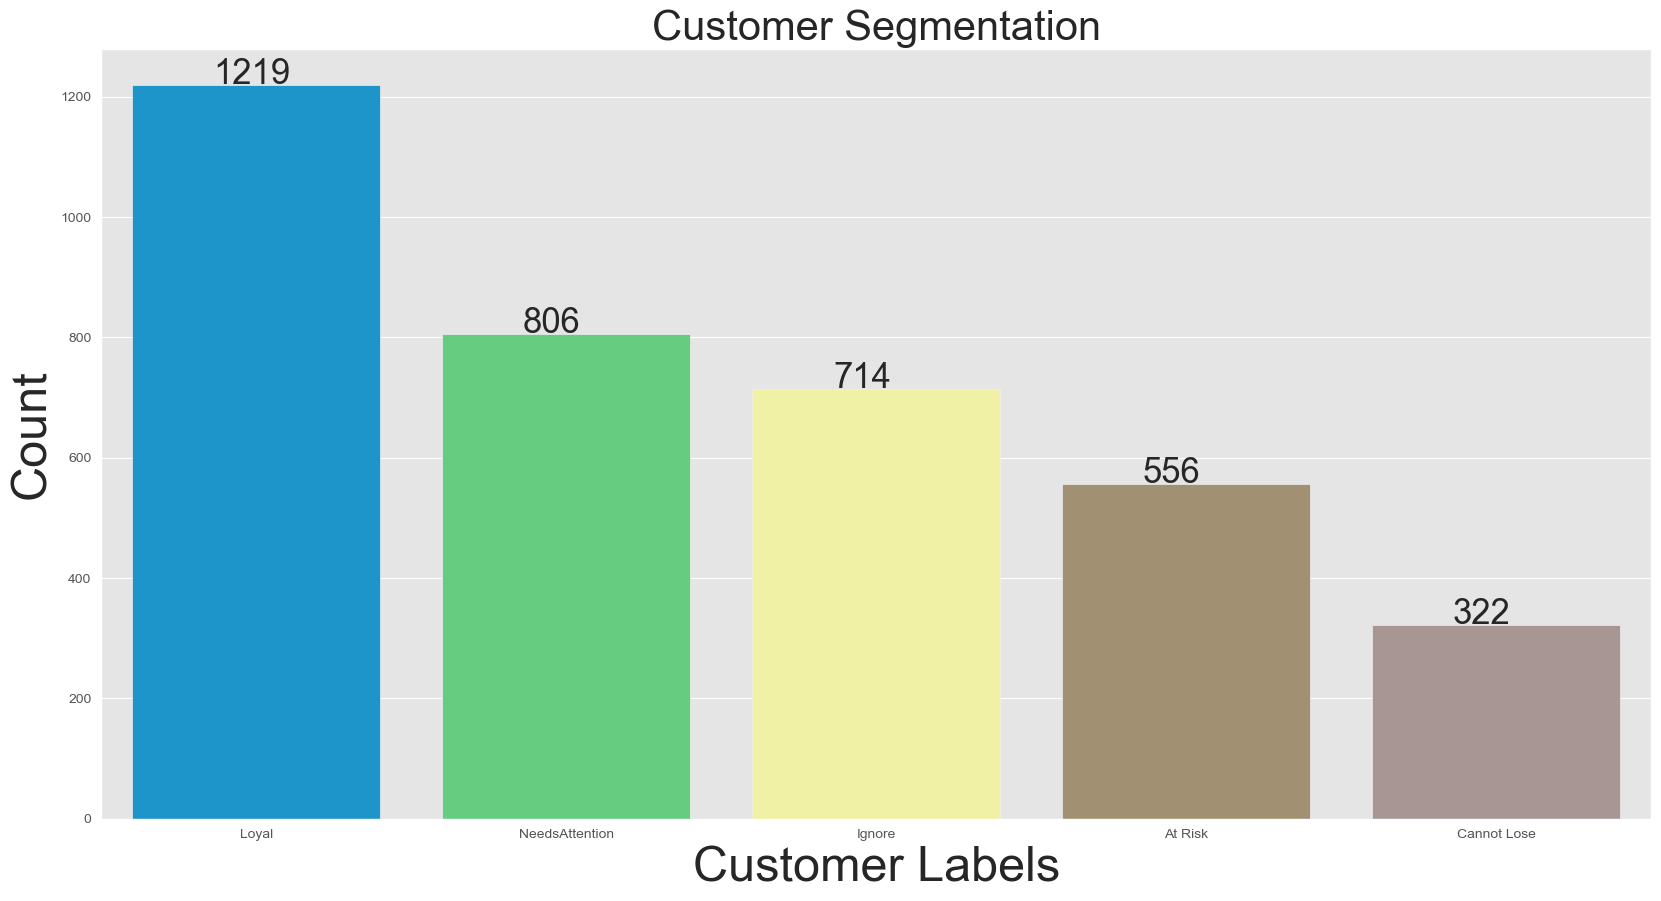

In [93]:
plt.figure(figsize=(20,10))
plt.style.use('_classic_test_patch')
ax = sns.countplot(x='Segment', data=RFM_table_copy, palette="terrain", order=RFM_table_copy['Segment'].value_counts().index[:5])
ax.set_ylabel('Count', fontsize = 35)
ax.set_xlabel('Customer Labels', fontsize = 35)
#ax.set_xticklabels(rfm_table['Label'].index, fontsize = 25)
ax.set_title('Customer Segmentation', fontsize = 30);

#labels_x = [ '\n'.join(wrap(l, 15)) for l in rfm_table['Label'].index ]
#ax.set_xticklabels(labels_x, fontsize = 19)

value_ticks = []
for x in RFM_table_copy['Segment'].value_counts():
    value_ticks.append(str(int(x)))

for a, label in zip(ax.patches, value_ticks):
    ax.annotate(label, (a.get_x() + 0.26, a.get_height() + 2), fontsize = 25)

In [94]:
RFM_table_copy.groupby('Segment').agg({'Recency':'mean', 'Frequency':'mean', 'Monetary':['mean','count']}).round(1)

Recency Frequency Monetary      
                   mean      mean     mean count
Segment                                         
At Risk           86.80     18.30   542.20   556
Cannot Lose      179.80     96.00  1780.00   322
Fresh Leads       25.30      9.30   227.20   228
Ignore           253.00     15.10   260.70   714
Loyal             18.00    204.20  3834.40  1219
NeedsAttention    53.60     50.40  1368.90   806
New & Promising   48.70     77.70  1491.10    74

In [95]:
RFM_table_copy.to_csv('RFM_table_copy.csv', index=False)